In [1]:
from IPython.display import display, HTML
display(HTML("""<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{fontsize:12pt;padding:5px;}
table.dataframe{font-size:12px;}))
</style>
"""))

<font size="5" color="red">ch12 데이터 시각화</font>

- 시각화 라이브러리 : matplotlib, seaborn(데이터시각화), folium(지도시각화)
- matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
- seaborn : matplotlib기반으로 다양한 색, 테마, 차트 기능과 groupby 기능 포함된 라이브러리

# 2절. Seaborn

    - 공식사이트 : https://seaborn.pydata.org
    - seaborn API : https://seaborn.pydata.org/api.html
- Seaborn으로 그래프를 그리기 위한 단계
    1. 데이터 준비
    2. 미적속성 설정 (한글 설정을 다시)
    3. 함수를 이용하여 그래프 그리기 (수치형, 변주형, 쌍관계, 밀도, 회귀, 다중그래프)
    4. 그래프 출력(show) 및 저장(savefig)

In [4]:
import seaborn

seaborn.__version__

'0.12.2'

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 선명도
%config InlineBackend.figure_format = 'retina'  
# 한글 설정
plt.rc('font', family = 'Malgun Gothic')  # windows
plt.rc('axes', unicode_minus = False)  # 축의 - 부분 깨짐 방지
# plt.rc('font', family = 'AppleGothic')  #Mac
# plt.rcParams['font'.family] = 'Malgun Gothic'  # Mac

# warning(경고) 안보이게



## 2.1 데이터 준비하기

- iris, titanic

In [10]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
iris.species.unique()  # 범주형 데이터들의 종류

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
iris['species'].value_counts()  # 범주별 데이터 갯수

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [14]:
titanic = sns.load_dataset('titanic')
# Survived - 생존유무, target 값. (0 = 사망, 1 = 생존)
# Name - 탑승객 성명
# Pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
# Sex - 성별
# Age - 나이(세)
# SibSp - 함께 탑승한 형제자매, 배우자 수 총합
# Parch - 함께 탑승한 부모, 자녀 수 총합
# Embarked - 탑승 항구
# Fare - 탑승 요금
# Ticket - 티켓 넘버
# Cabin - 객실 넘버
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
titanic.shape

(891, 15)

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [16]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 2.2 미적속성 설정하기 (style, context, palette, figsize..)

### 1) 그래프 style 설정

- https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style (교안 51page)
- 범례사용 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot (교안20page)

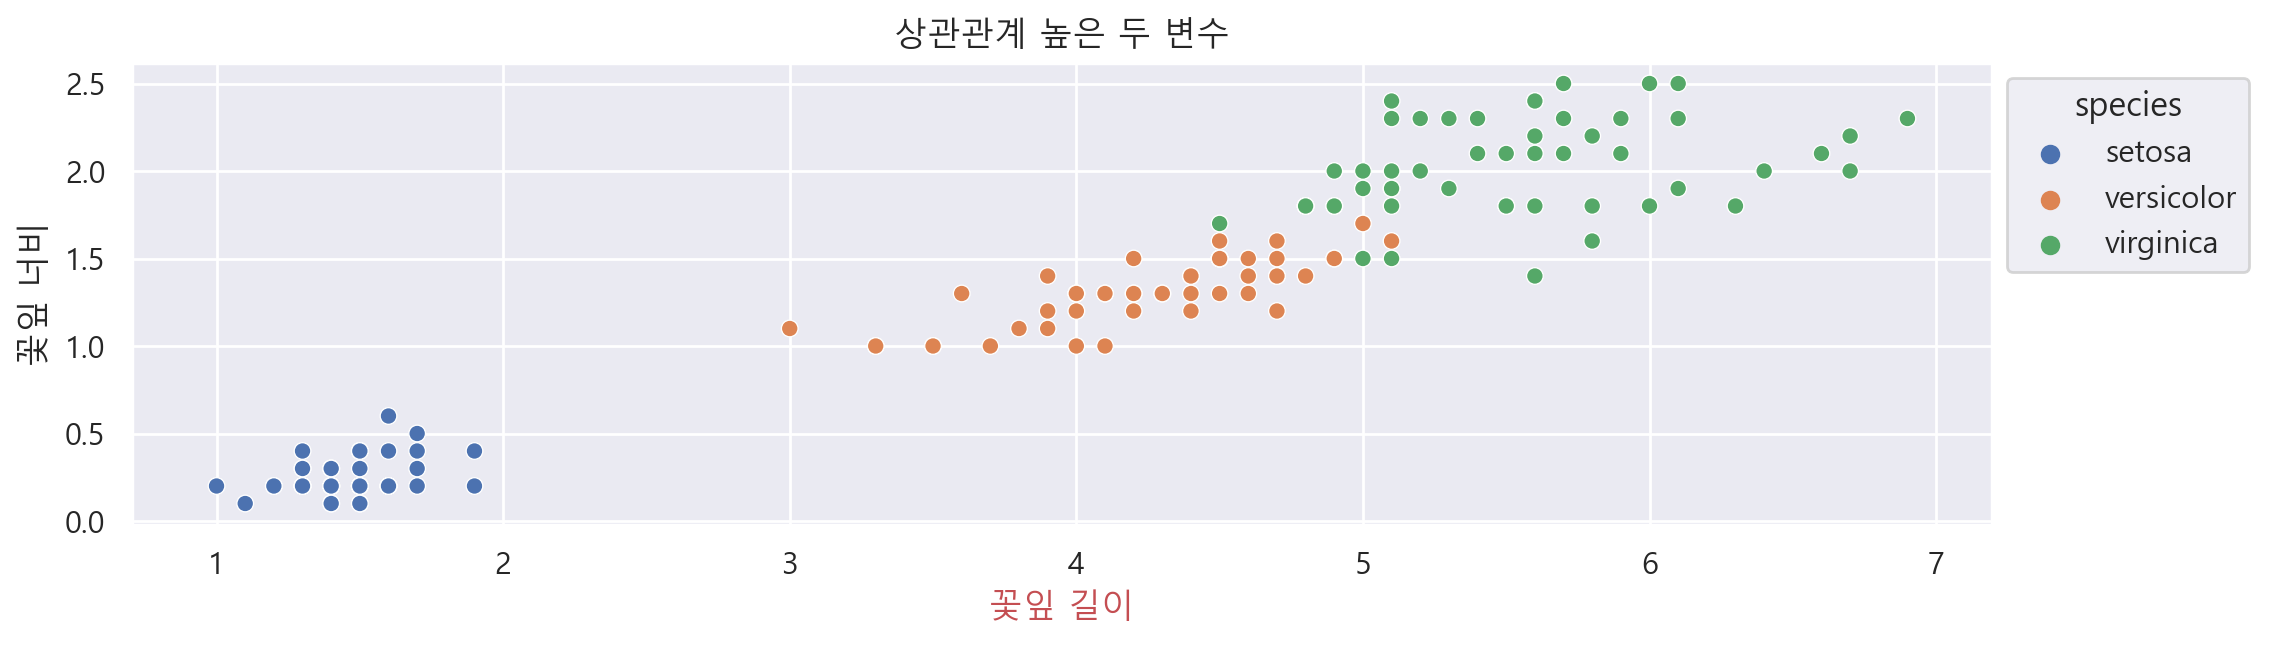

In [26]:
plt.figure(figsize = (12,3))
sns.set(style = 'darkgrid') # white, whitegrid, dark, darkgrid, ticks
plt.rc('font', family = 'Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus = False) # 축의 - 부분 깨짐 방지

ax = sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species')
sns.move_legend(ax, "upper left", bbox_to_anchor = (1, 1))
ax.set(title = '상관관계 높은 두 변수',
       ylabel = '꽃잎 너비')
ax.set_xlabel('꽃잎 길이', color = 'r')
plt.show()

### 2) 컨텍스트 지정 (비율)

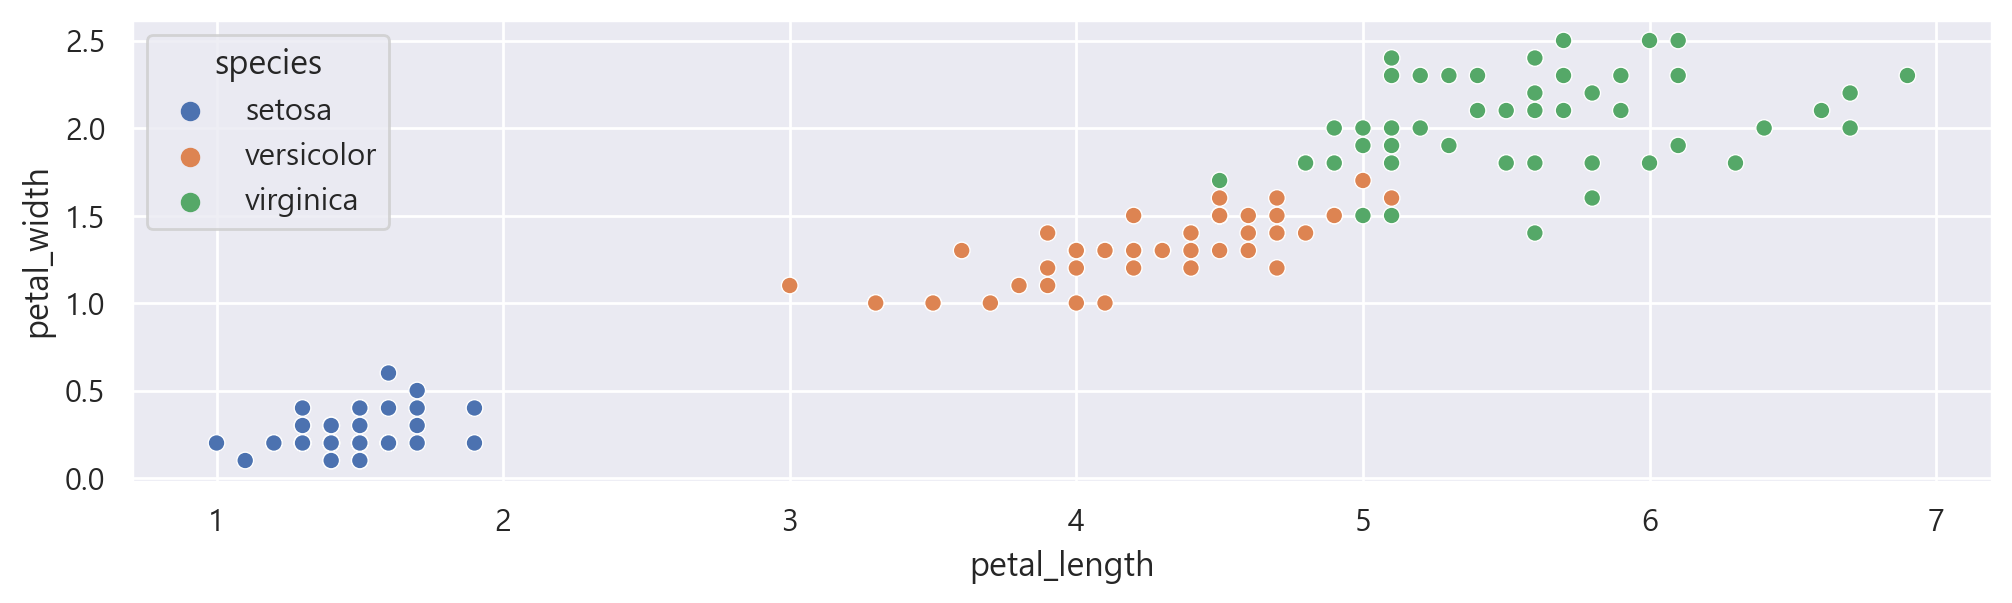

In [18]:
plt.figure(figsize = (12,3))
# sns.set(context = 'notebook') # notebook(1.0), paper(0.8), talk(1.3), poster(1.8)
sns.set_context('notebook')
plt.rc('font', family = 'Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus = False) # 축의 - 부분 깨짐 방지

sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species')
plt.show()

### 3) 컬러 팔레트

- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- https://matplotlib.org/stable/users/explain/colors/colormaps.html
- https://seaborn.pydata.org/tutorial/color_palettes.html

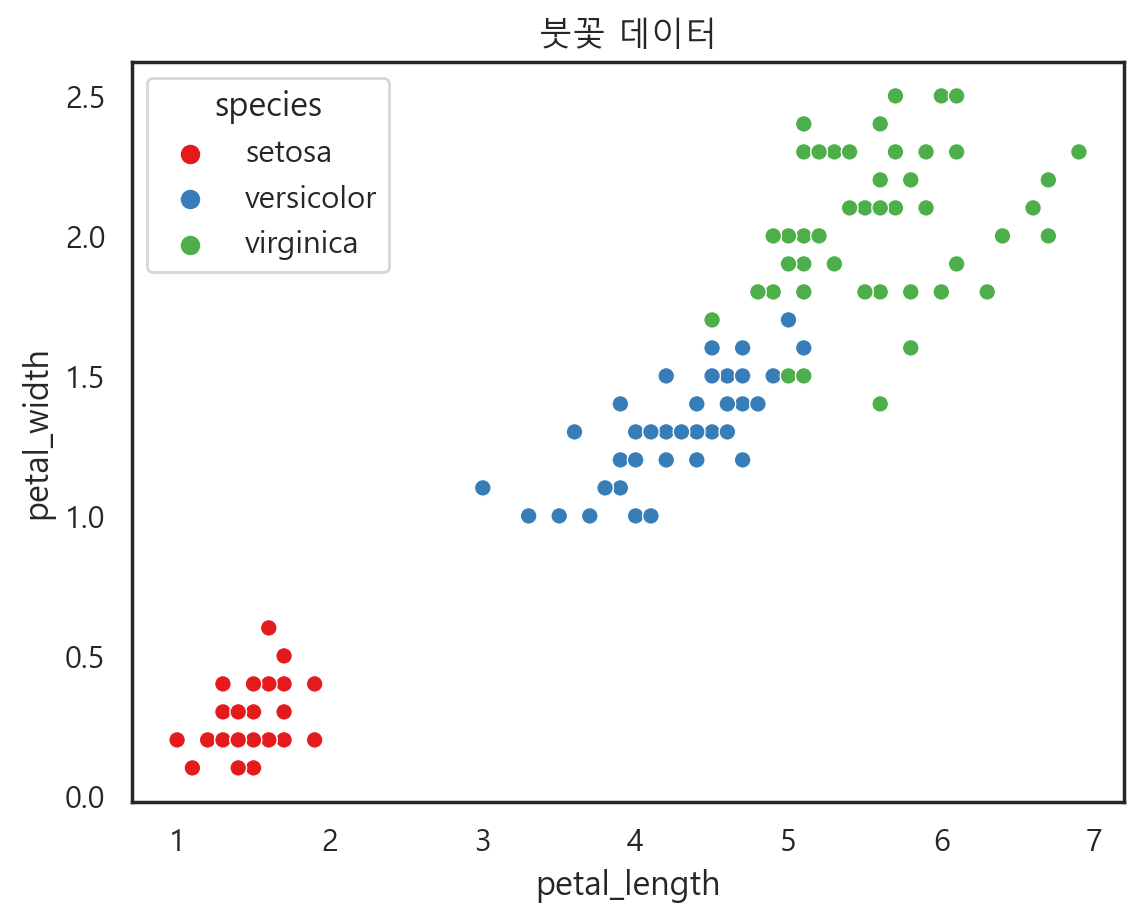

In [24]:
sns.set(palette = 'Pastel1', style = 'white', context = 'notebook')  # 기본 미적 속성설정

plt.rc('font', family = 'Malgun Gothic')  # windows
plt.rc('axes', unicode_minus = False)  # 축의 - 부분 깨짐 방지

ax = sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width',
                     hue = 'species', palette = 'Set1')
ax.set_title('붓꽃 데이터')
plt.show()

In [25]:
sns.set(palette = 'Dark2', 
        style = 'whitegrid', 
        context = 'notebook', 
        rc = ({'figure.figsize':(10, 3)}))  # 기본 미적 속성설정

plt.rc('font', family = 'Malgun Gothic')  # windows
plt.rc('axes', unicode_minus = False)  # 축의 - 부분 깨짐 방지

## 2.3 Seaborn 함수로 그래프 그리기

### 1) 관계형 그래프

    - x축이 수치형 데이터
(ex) scatterplot, lineplot → relpot(서브플롯)

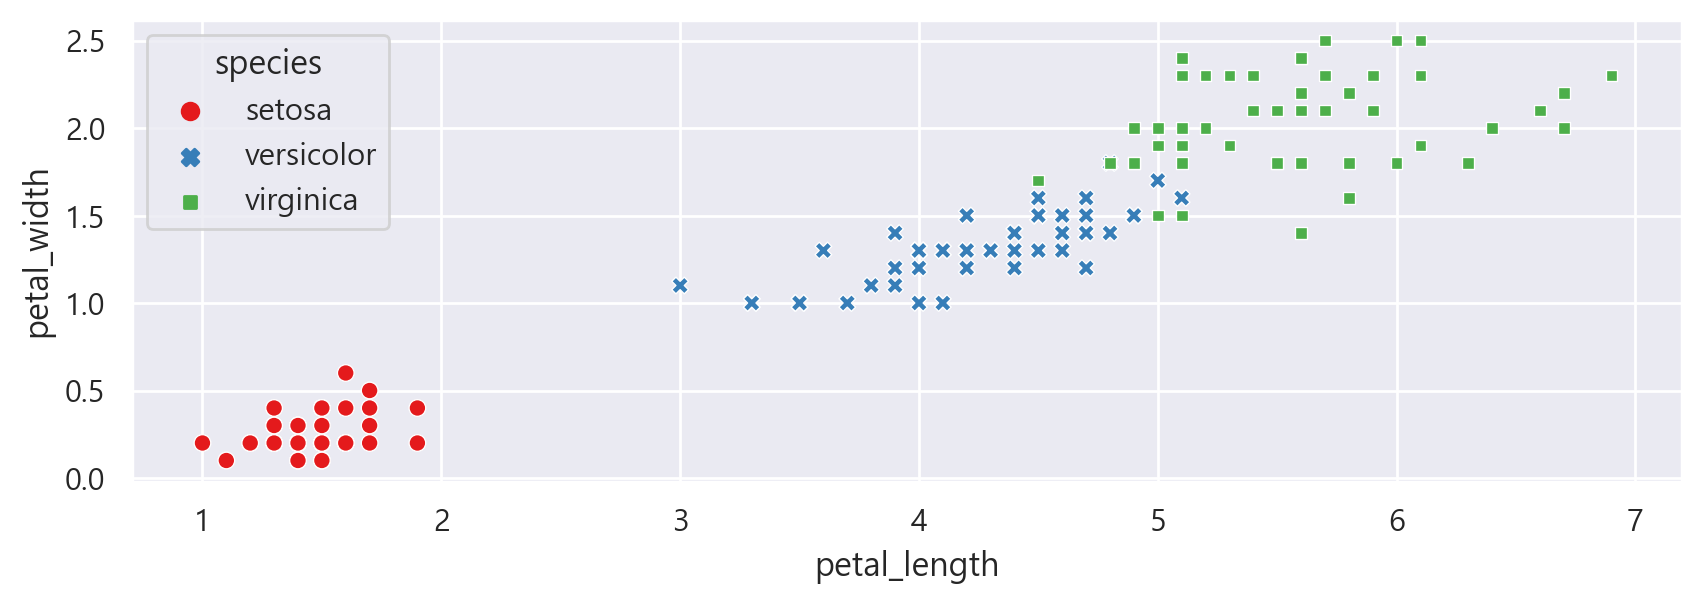

In [27]:
sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species', 
                palette = 'Set1', style = 'species')
        # species별 색상과 스타일이 다른 scatterplot
plt.show()

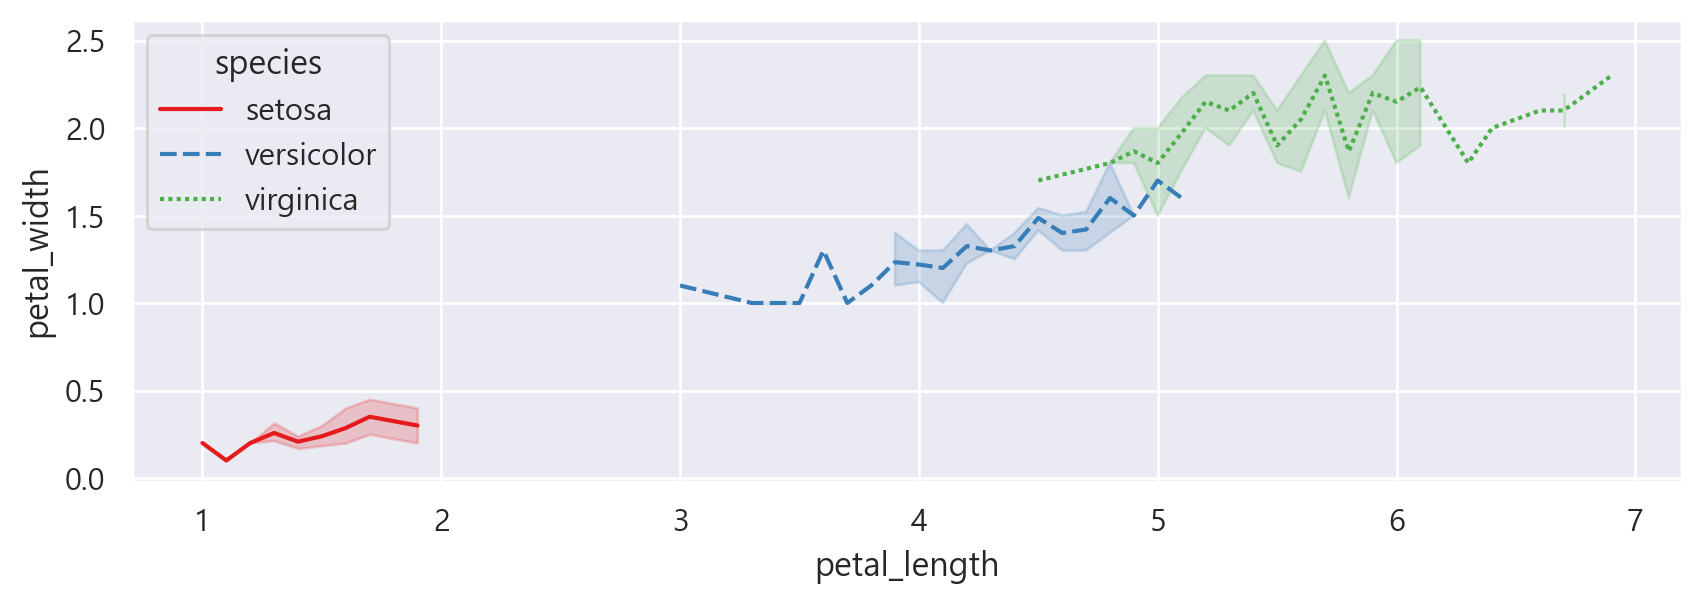

In [30]:
# 종별 lineplot 
# lineplot의 음영 : 95%신뢰구간

sns.lineplot(data = iris, x = 'petal_length', y = 'petal_width',
             hue = 'species', palette = 'Set1', style = 'species')
plt.show()

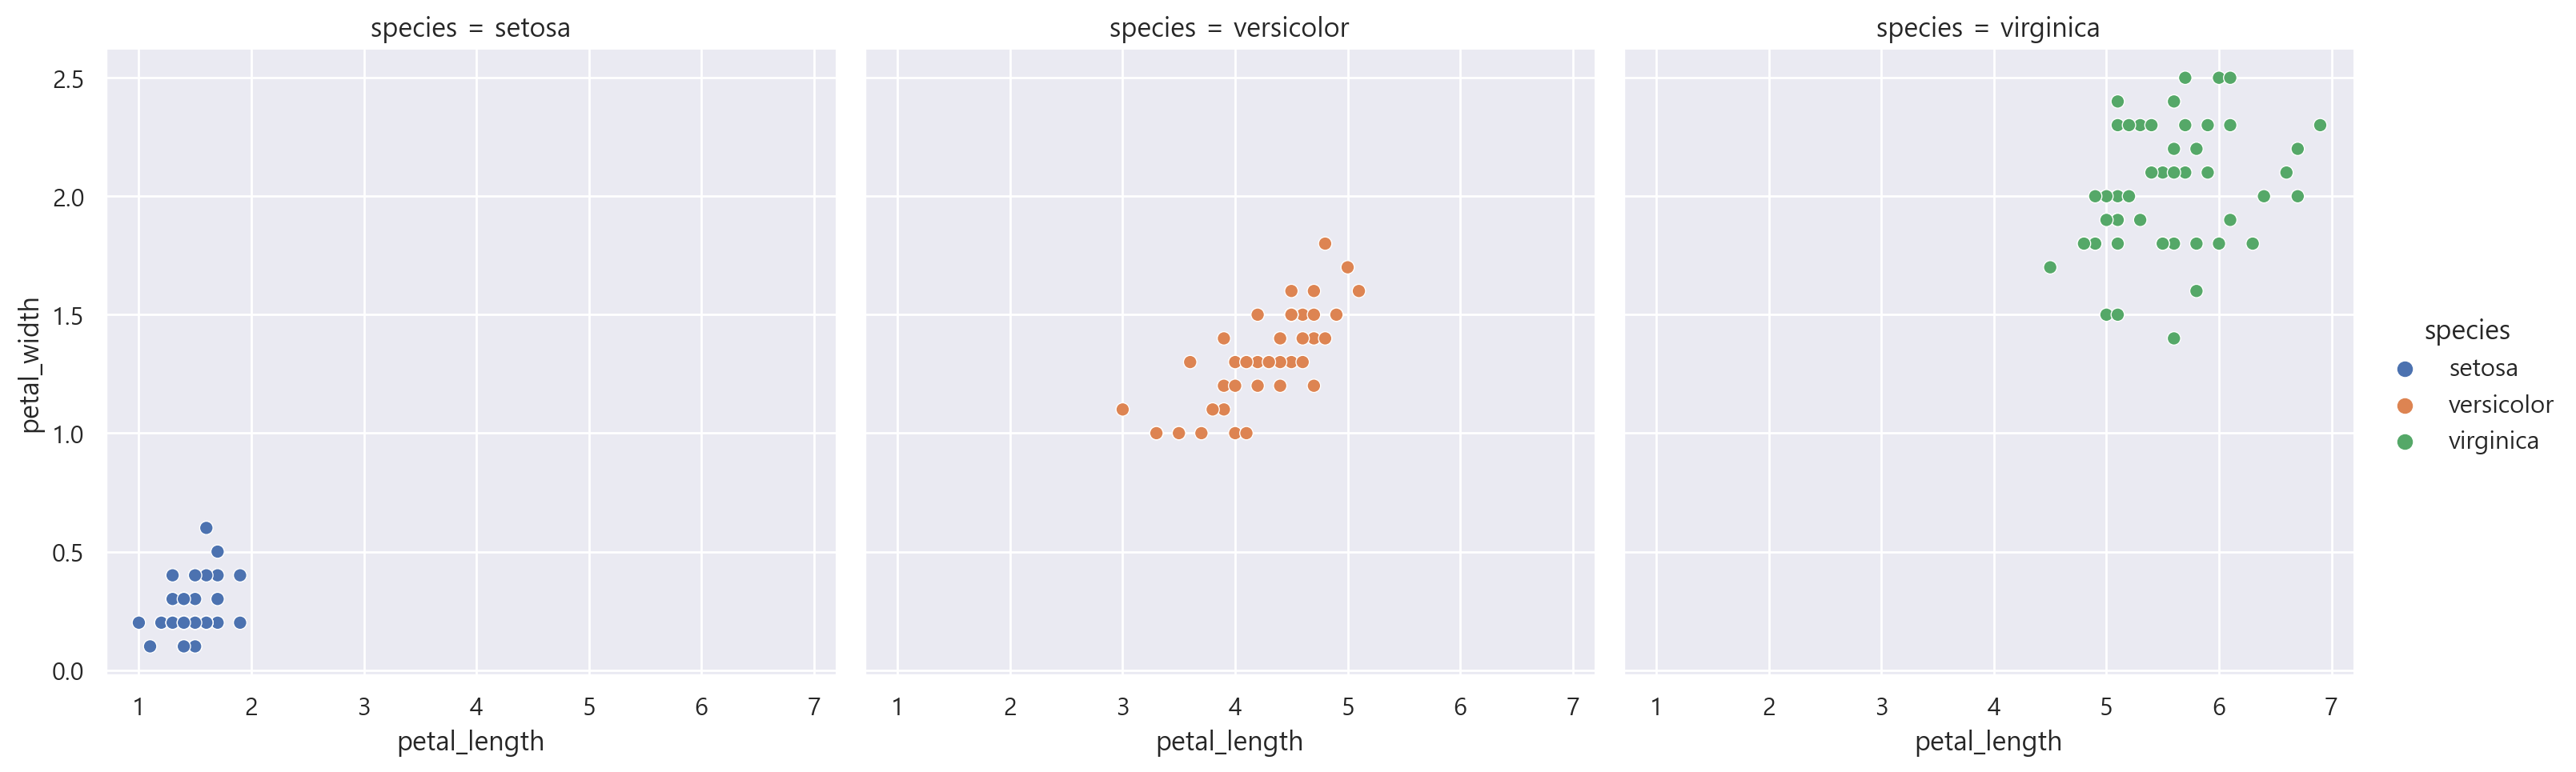

In [32]:
# 종별 lineplot을 서브플롯으로

sns.relplot(data = iris, x = 'petal_length', y = 'petal_width',
           hue = 'species',
           # kind = 'line',  # kind = 'scatter' 가 기본값
           col = 'species',  # species별 서브플롯
           # col_wrap = 2,  # 한줄에 표현될 서브플롯 수           
          )
plt.show()

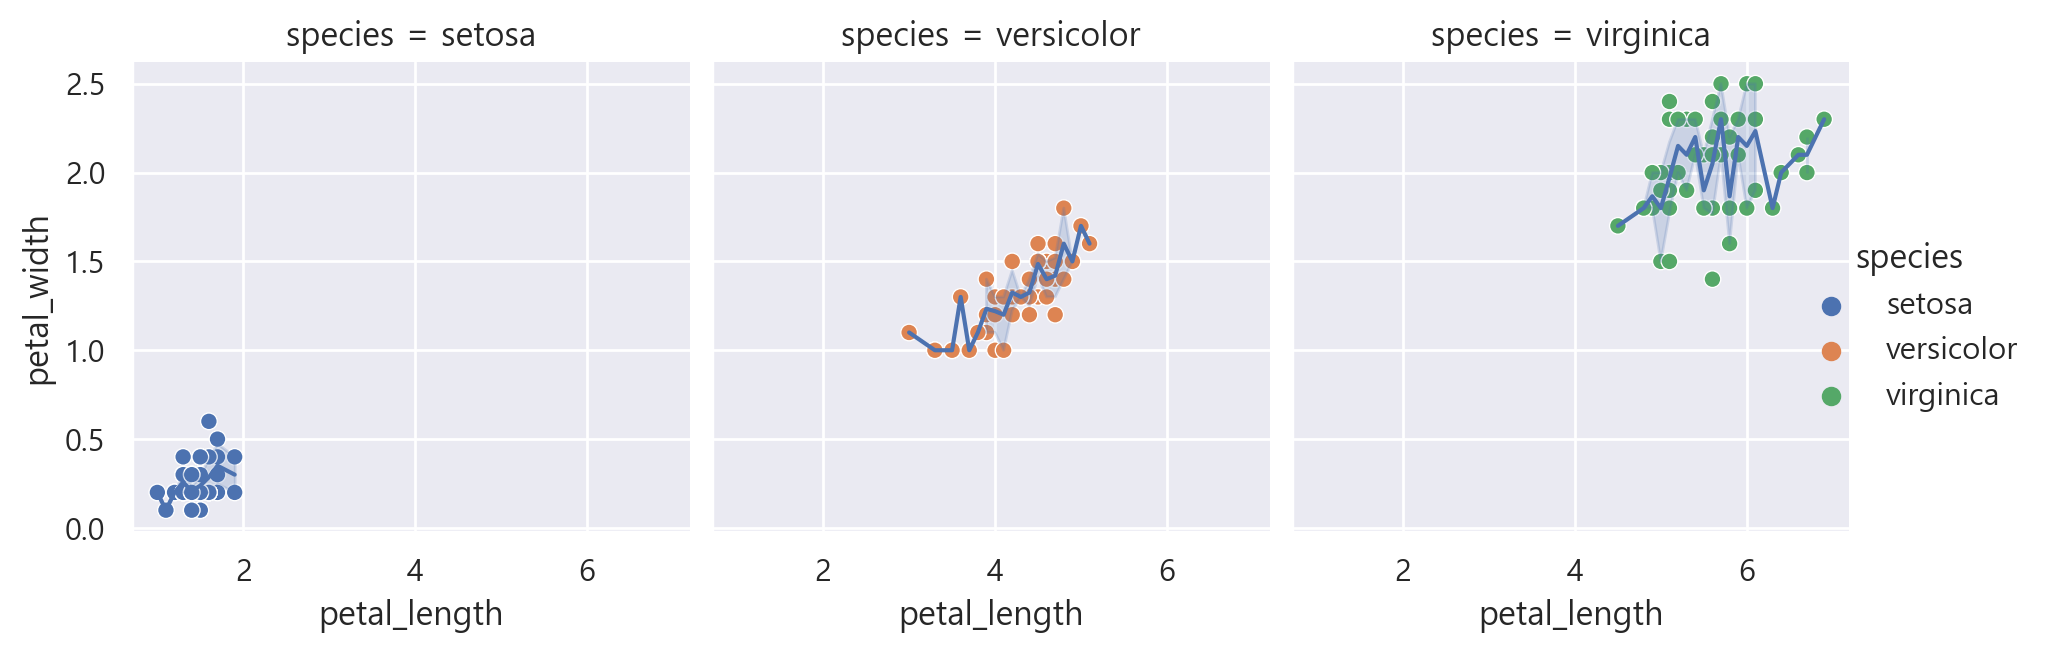

In [33]:
# line과 scatter를 종별 서브플롯으로 겹쳐서 

g = sns.relplot(data = iris, x = 'petal_length', y = 'petal_width',
           hue = 'species',
           # kind = 'line',  # kind = 'scatter'가 기본값
           col = 'species',  # species별 서브플롯
           # col_wrap = 2,  # 한줄에 표현될 서브플롯 수
           )
# g그래프에 line플롯을 추가
g.map_dataframe(sns.lineplot, x = 'petal_length', y = 'petal_width')
# 크기 조정 : 서브플롯함수에서는 내부적으로 figure 새로 만들기 때문에 figsize 무시
g.fig.set_size_inches(10, 3)

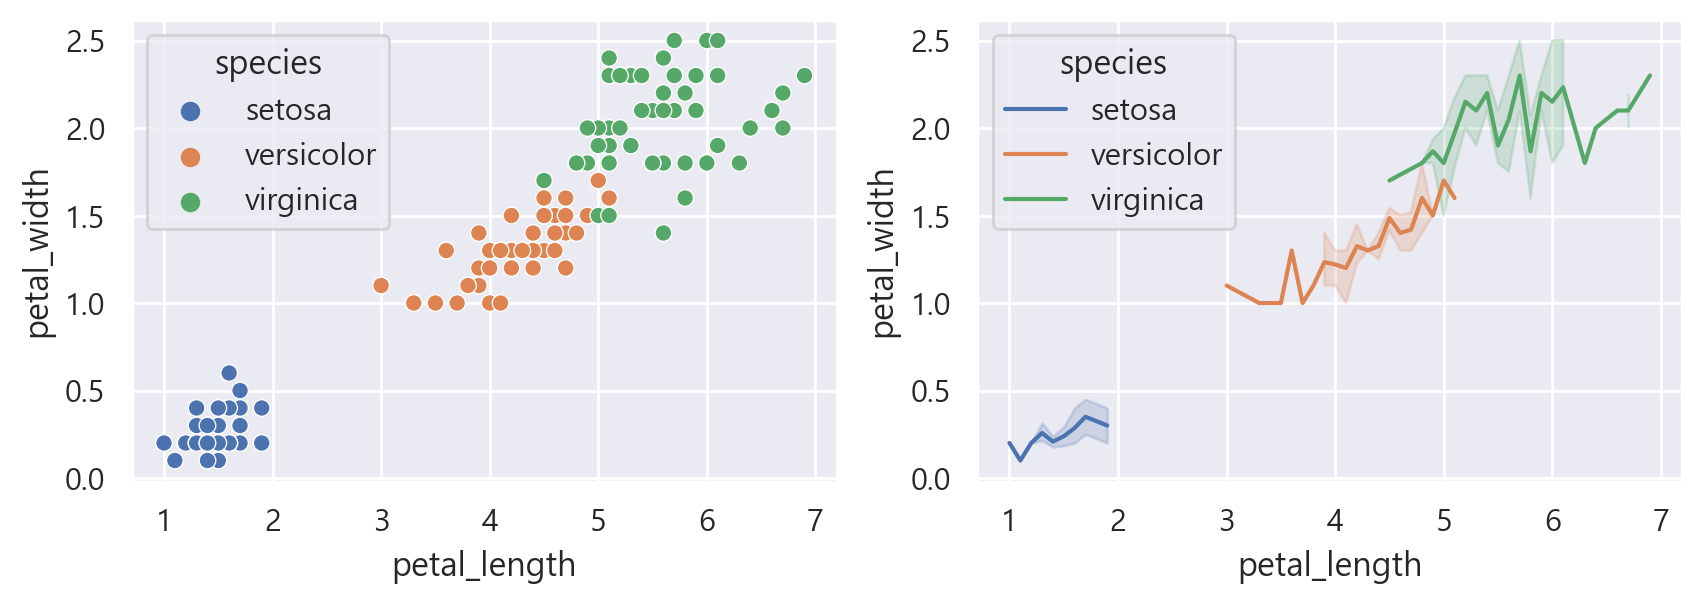

In [48]:
# ax[0]에는 scatter, ax[1]에는 lineplot

fig, ax = plt.subplots(1, ncols = 2)
sns.scatterplot(data = iris, 
                x = 'petal_length', 
                y = 'petal_width', 
                hue = 'species', 
                ax = ax[0])
sns.lineplot(data = iris, 
            x = 'petal_length', 
            y = 'petal_width', 
            hue = 'species',
            ax = ax[1])
plt.show()

### 2) 범주형 그래프

        - x축이 범주형 데이터
```        
(ex) stripplot(무작위 흩뿌림), swarmplot(겹치지 않는 산점도)
     barplot, barhplot(y의 평균으로 막대그래프), pointplot(y의 평균으로 line)
     countplot(y값이 없어 x의 빈도수가 높이)
     boxplot, violineplot, boxenplot
     → catplot(서브플롯)
```

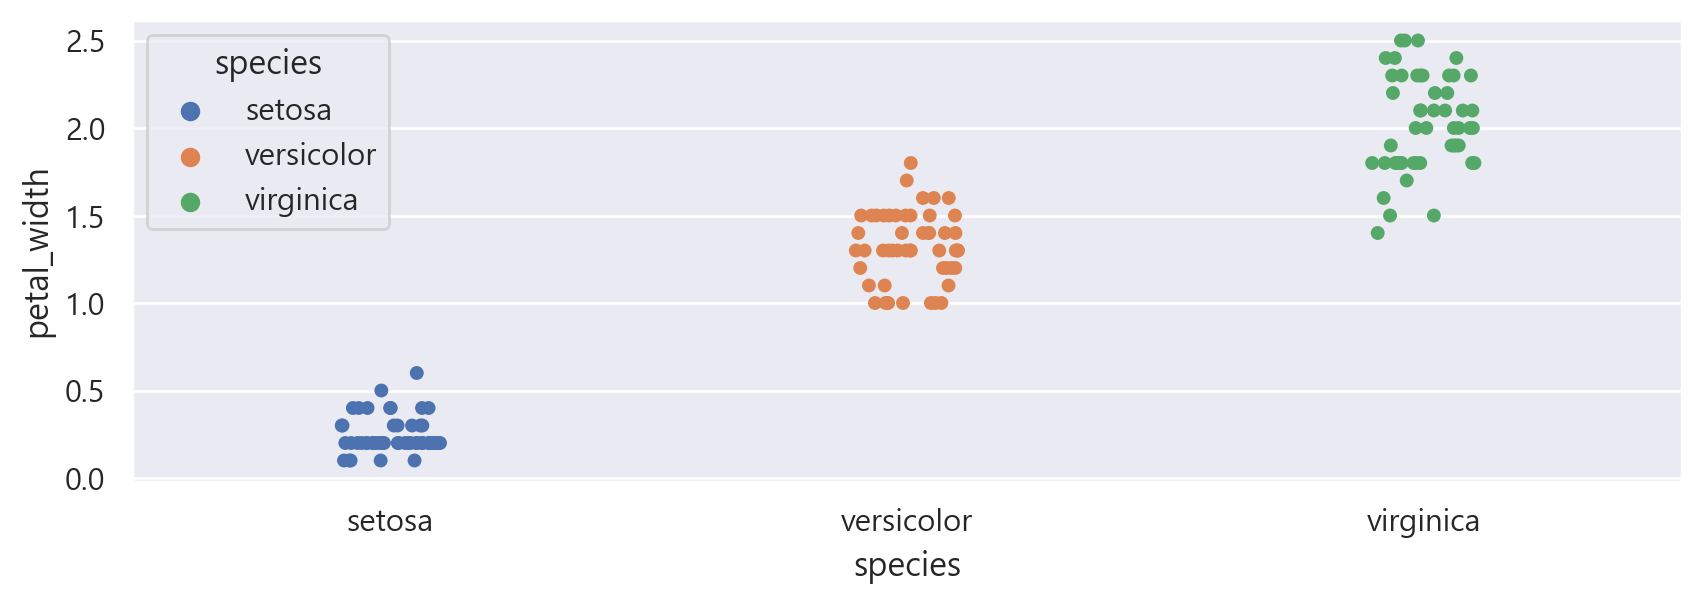

In [38]:
# x축이 범주형일 때의 산점도

sns.stripplot(data = iris, x = 'species', y = 'petal_width', hue = 'species')
plt.show()

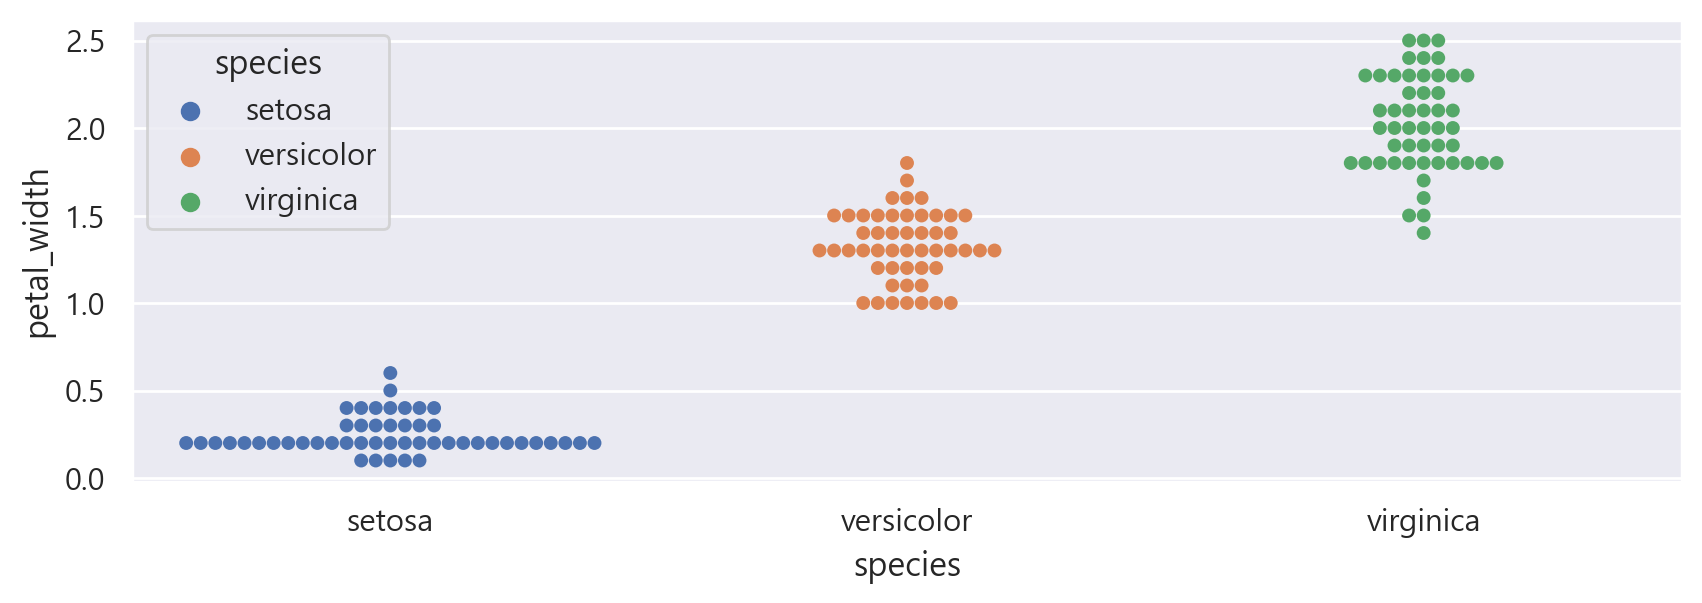

In [37]:
# x축이 범주형일 때의 산점도 (분포 포함)

sns.swarmplot(data = iris, x = 'species', y = 'petal_width', hue = 'species')
plt.show()

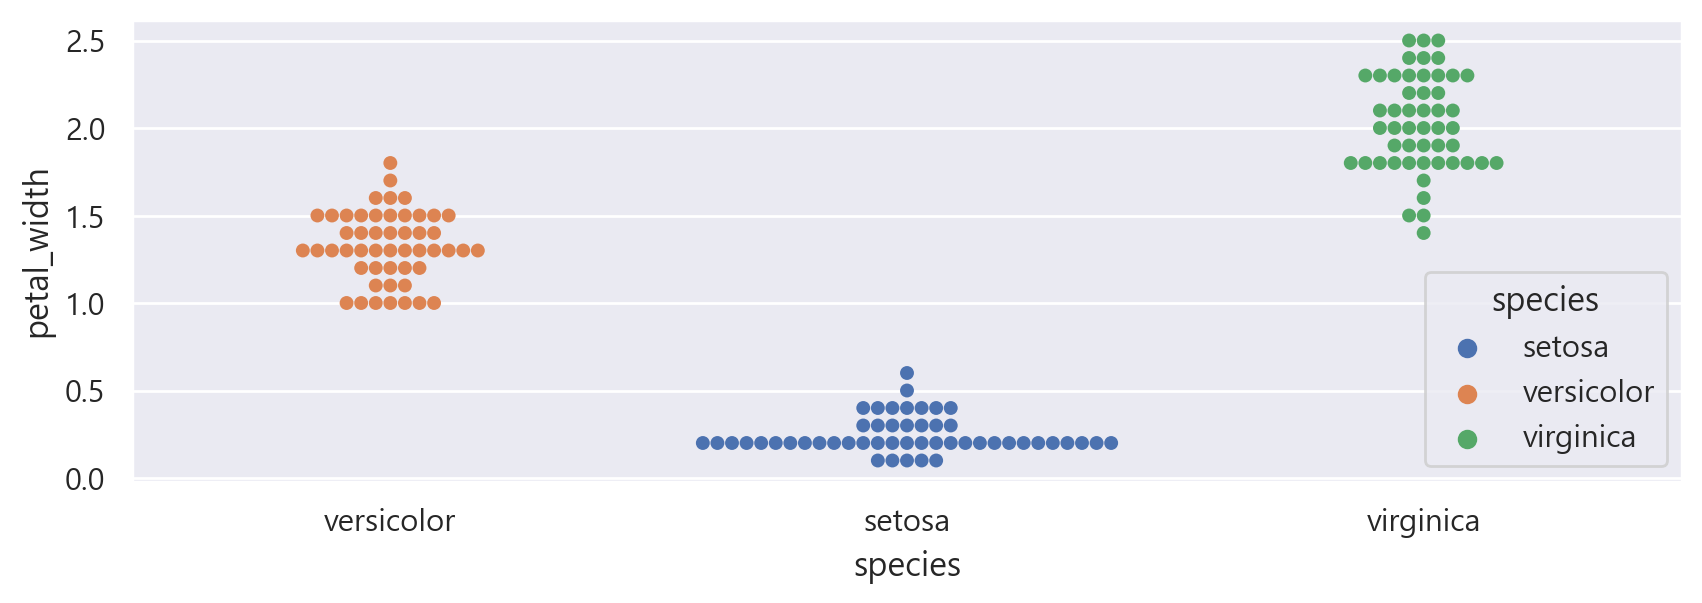

In [41]:
sns.swarmplot(data = iris, 
              x = 'species', 
              y = 'petal_width', 
              hue = 'species', 
              order = ['versicolor', 'setosa', 'virginica'])
plt.show()

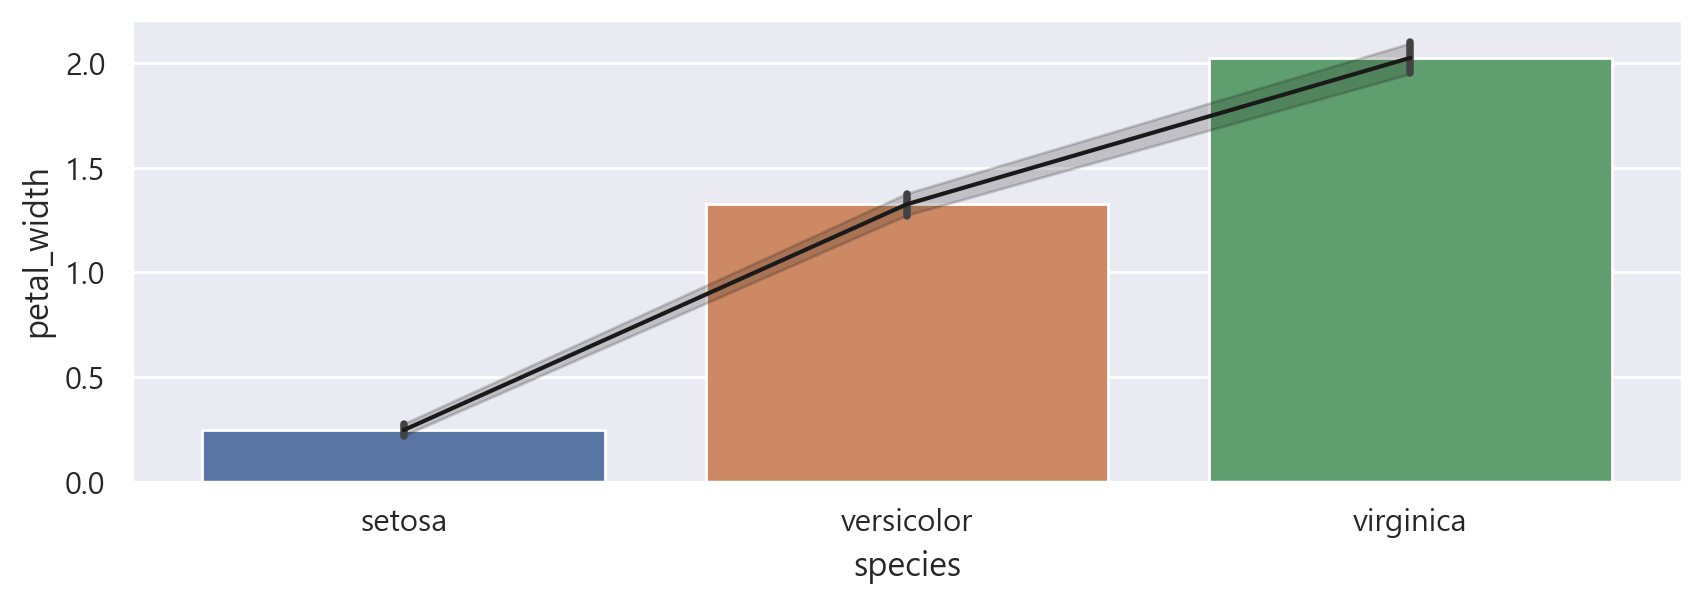

In [43]:
# barplot, barhplot, pointplot : 각 범주별 평균값(y)과
            # 신뢰구간 제외 : errorbar = None
sns.barplot(data = iris, x = 'species', y = 'petal_width',
           # errorbar = None
           )
sns.lineplot(data = iris, x = 'species', y = 'petal_width', color = 'k')
plt.show()

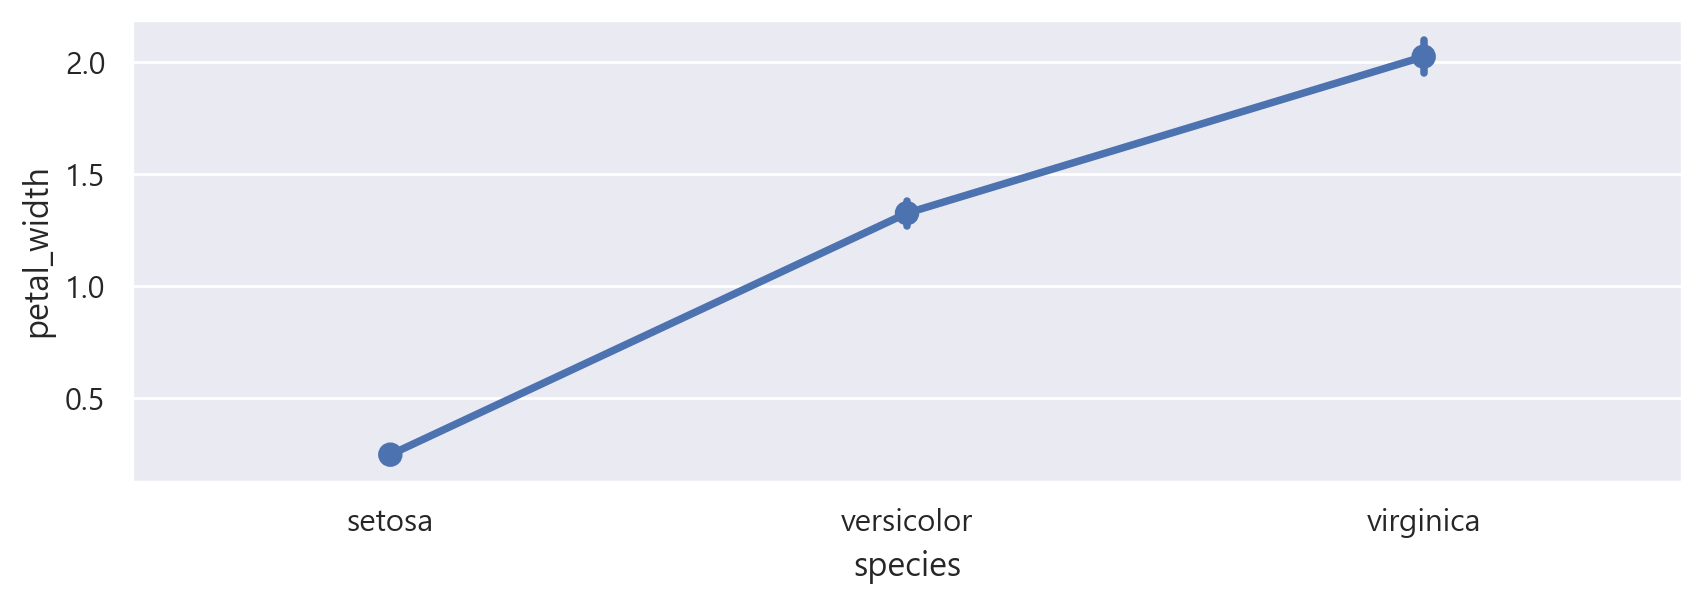

In [45]:
sns.pointplot(data = iris, x = 'species', y = 'petal_width')  # 신뢰구간을 제외
plt.show()

In [46]:
# 성별 생존율을 막대그래프

titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [50]:
titanic.dtypes.head(3)

survived     int64
pclass       int64
sex         object
dtype: object

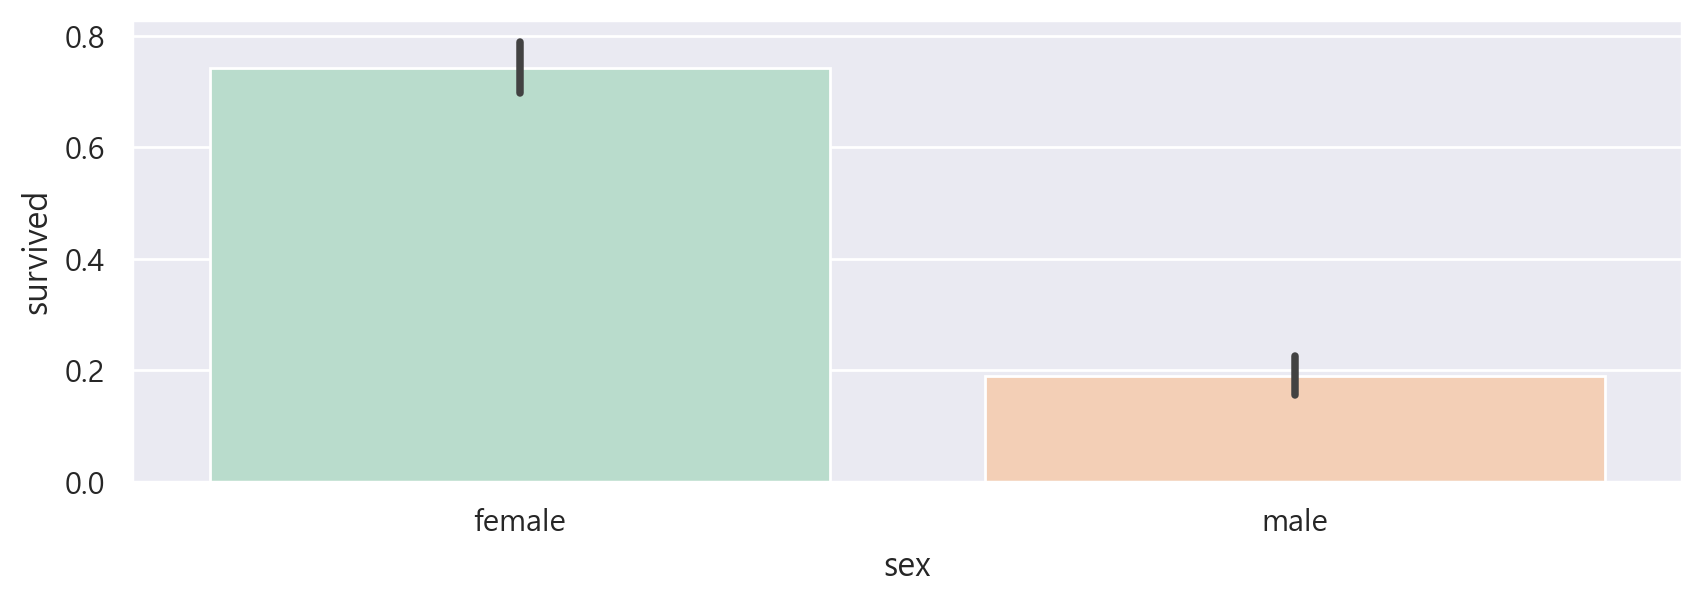

In [49]:
# 성별 생존율을 막대그래프

sns.barplot(data = titanic,
            x = 'sex',
            y = 'survived', 
            order = ['female', 'male'],
            palette = 'Pastel2')
plt.show()

In [51]:
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [53]:
# 남자(577) 중 사망자

len(titanic[(titanic.sex == 'male') & (titanic.survived == 0)])

468

In [54]:
# 남자(577) 중 생존자

len(titanic[(titanic.sex == 'male') & (titanic.survived == 1)])

109

In [58]:
# 여자(314) 중 사망자

len(titanic[(titanic.sex == 'female') & (titanic.survived == 0)])

81

In [59]:
# 여자(314) 중 생존자

len(titanic[(titanic.sex == 'female') & (titanic.survived == 1)])

233

In [60]:
titanic.sample(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
499,0,3,male,24.0,0,0,7.7958,S,Third,man,True,NaN,Southampton,no,True
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False


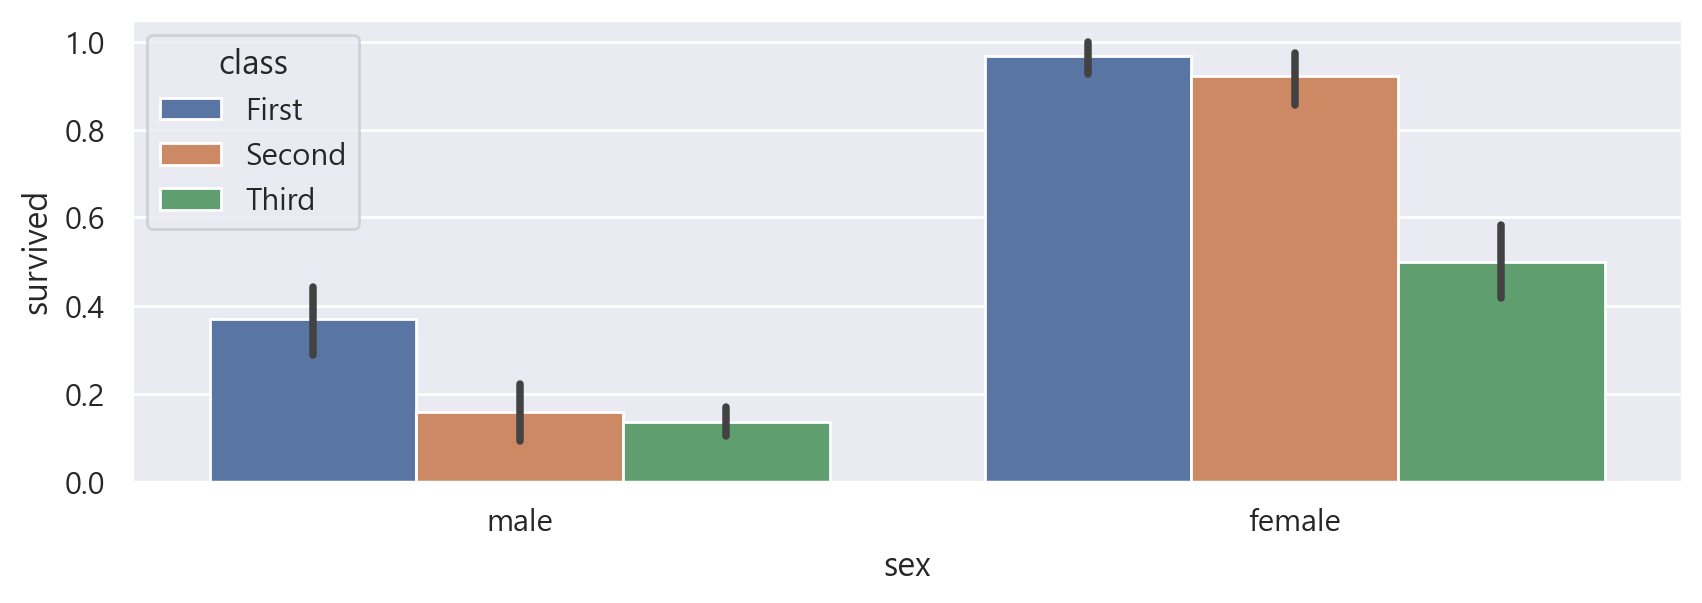

In [61]:
# 성별 생존율 hue = 'class'

sns.barplot(data = titanic, x = 'sex', y = 'survived', hue = 'class')
plt.show()

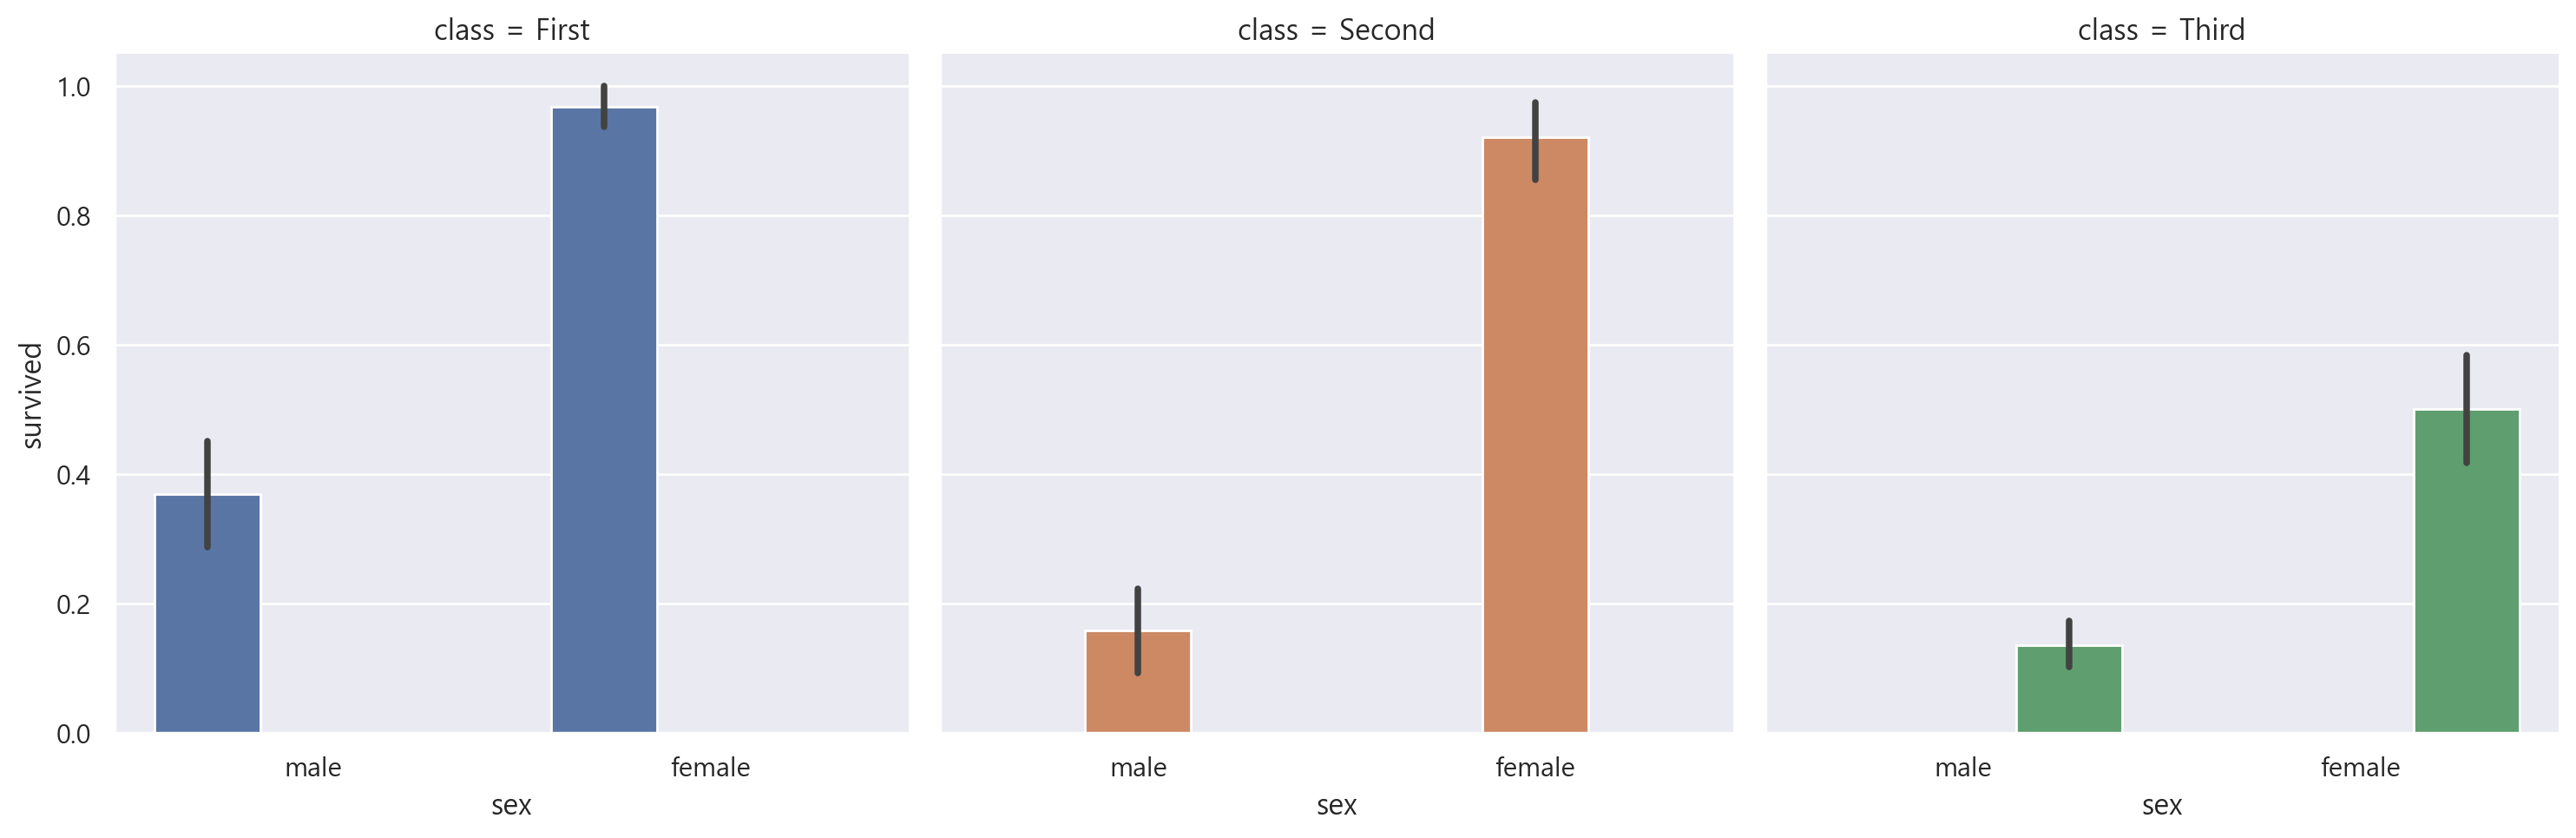

In [66]:
# class별로 성별생존율을 서브플롯 (막대그래프)

sns.catplot(data = titanic,
            x = 'sex',
            y = 'survived',
            hue = 'class',
            kind = 'bar',  # 기본값은 stripplot
            col = 'class',  # 분리
            # col_wrap = 2  # 한행에 그려질 서브플롯 갯수. 기본값은 n개
           )
g.fig.set_size_inches(10, 3)

In [69]:
# 성별 생존율 hue = 'class'

sns.pointplot(data = titanic,
              x = 'class',
              y = 'survived', 
              hue = 'sex',
              markers = ['^', 'o'],
              linestyles = ['-.', ':'],
              palette = {'male:'b',female:'r''}
             )
plt.show()

SyntaxError: cannot mix bytes and nonbytes literals (3572909521.py, line 9)

In [71]:
titanic.deck.isna().sum()

688

In [72]:
totallen = len(titanic)
nanlen = titanic.deck.isna().sum()
datalen = totallen - nanlen
print('전체 갯수 : {}, 결측치 갯수 : {}'.format(totallen,
                                              nanlen,
                                              datalen)
     )

전체 갯수 : 891, 결측치 갯수 : 688


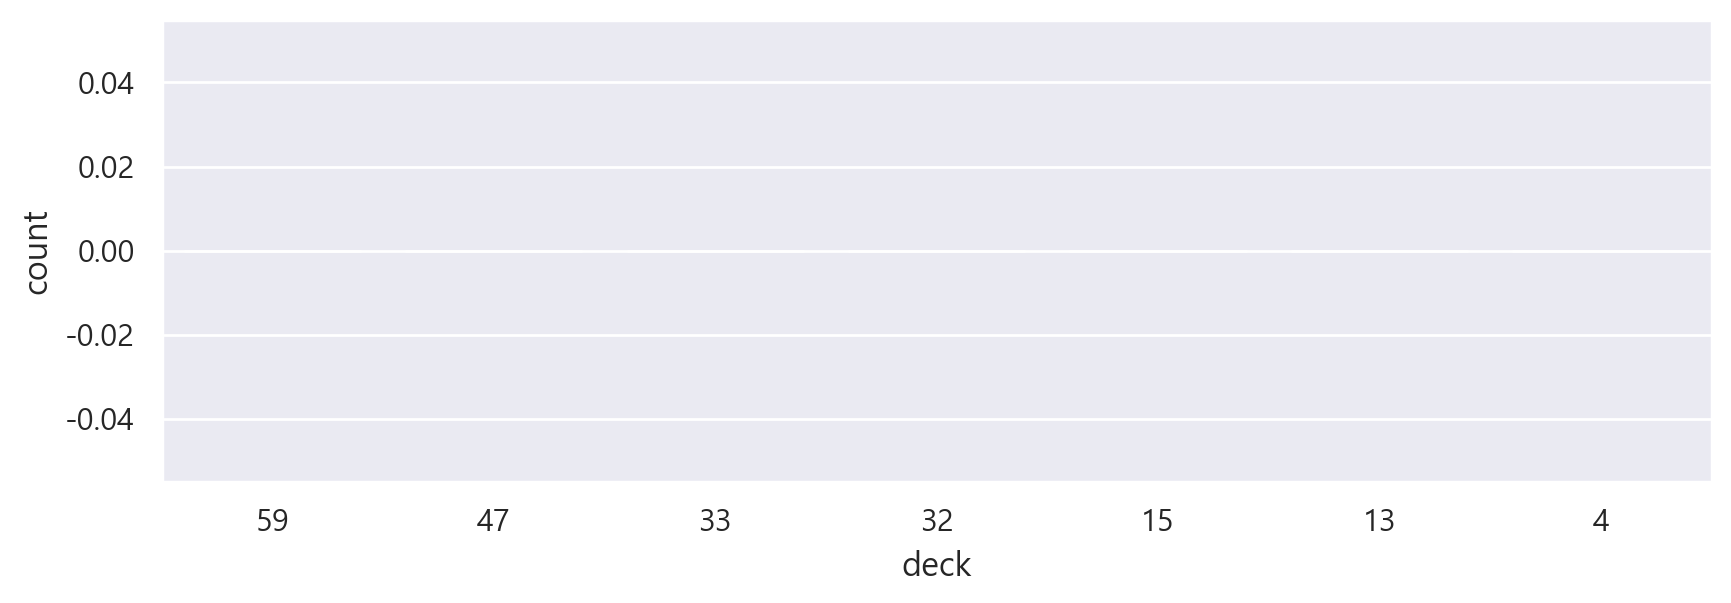

In [79]:
# deck별 갯수를 막대그래프(countplot)

sns.countplot(data = titanic,
              x = 'deck',
              # order = ['C', 'B', 'D', 'E', 'A', 'F', 'G']
              order = deckcnt)
plt.show()

In [77]:
deckcnt = titanic.deck.value_counts()  # 범주별 데이터 갯수 (정렬 포함)
deckcnt  # deckcnt.index의 count가 큰 순서

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [76]:
titanic.groupby('deck').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
deck,,,,,,,,,,,,,,
A,15,15,15,12,15,15,15,15,15,15,15,15,15,15
B,47,47,47,45,47,47,47,45,47,47,47,45,47,47
C,59,59,59,51,59,59,59,59,59,59,59,59,59,59
D,33,33,33,31,33,33,33,33,33,33,33,33,33,33
E,32,32,32,30,32,32,32,32,32,32,32,32,32,32
F,13,13,13,11,13,13,13,13,13,13,13,13,13,13
G,4,4,4,4,4,4,4,4,4,4,4,4,4,4


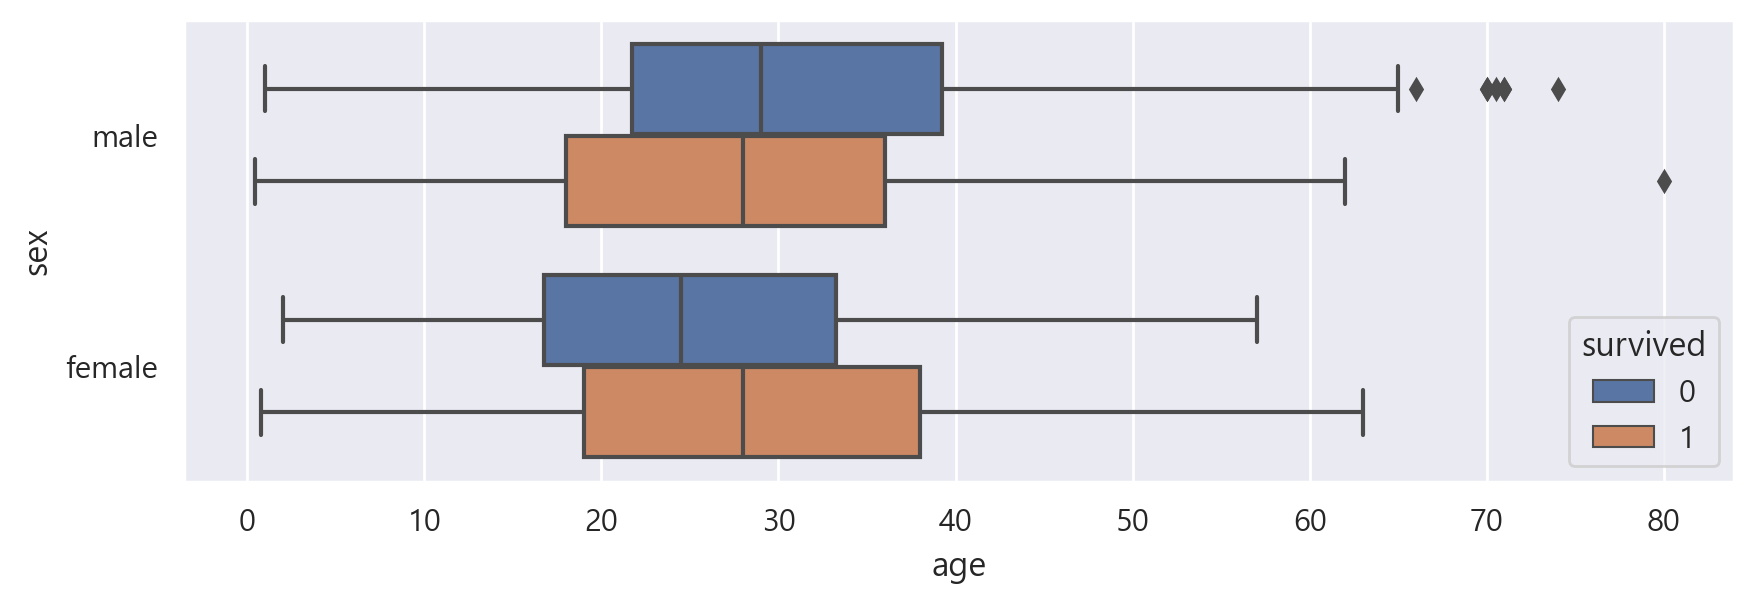

In [84]:
# boxplot

sns.boxplot(data = titanic, x = 'age', y = 'sex', hue = 'survived')
plt.show()

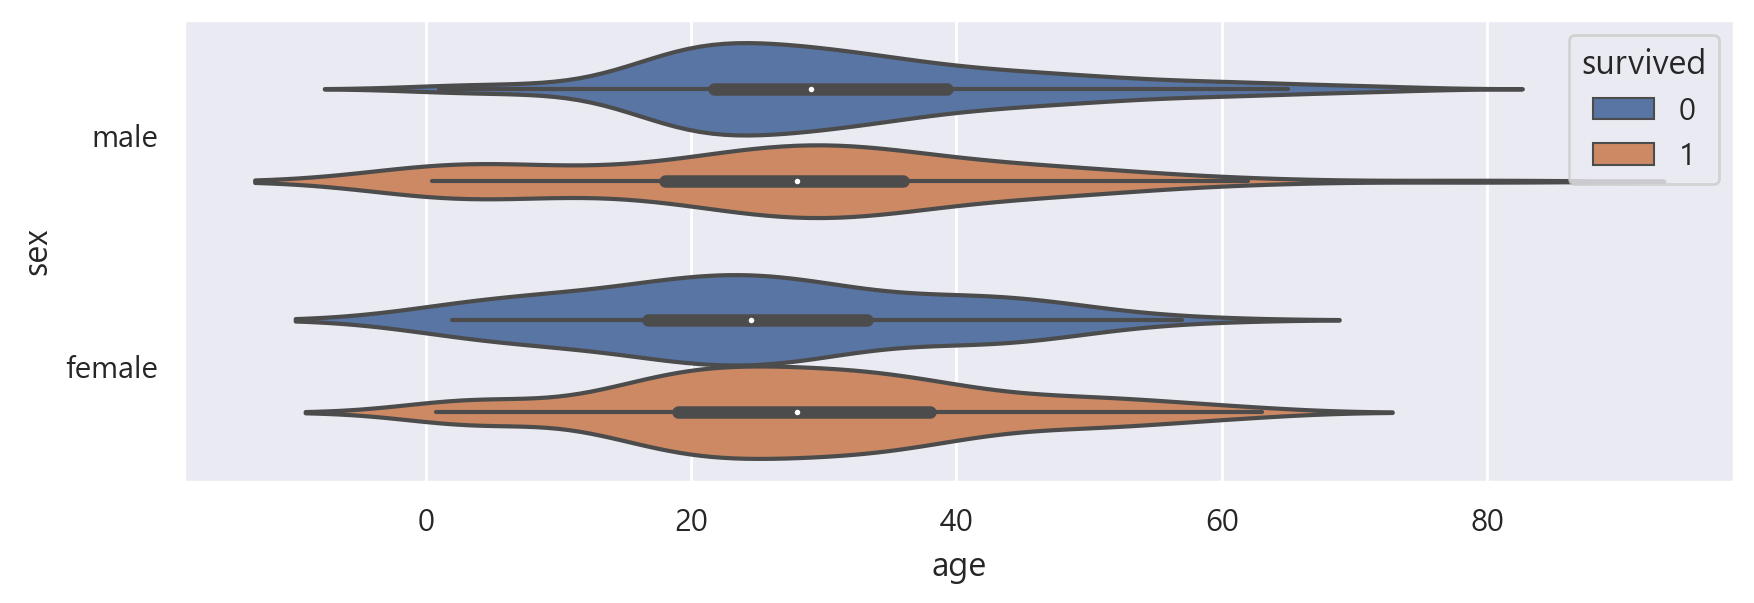

In [85]:
# violinplot

sns.violinplot(data = titanic, x = 'age', y = 'sex', hue = 'survived')
plt.show()

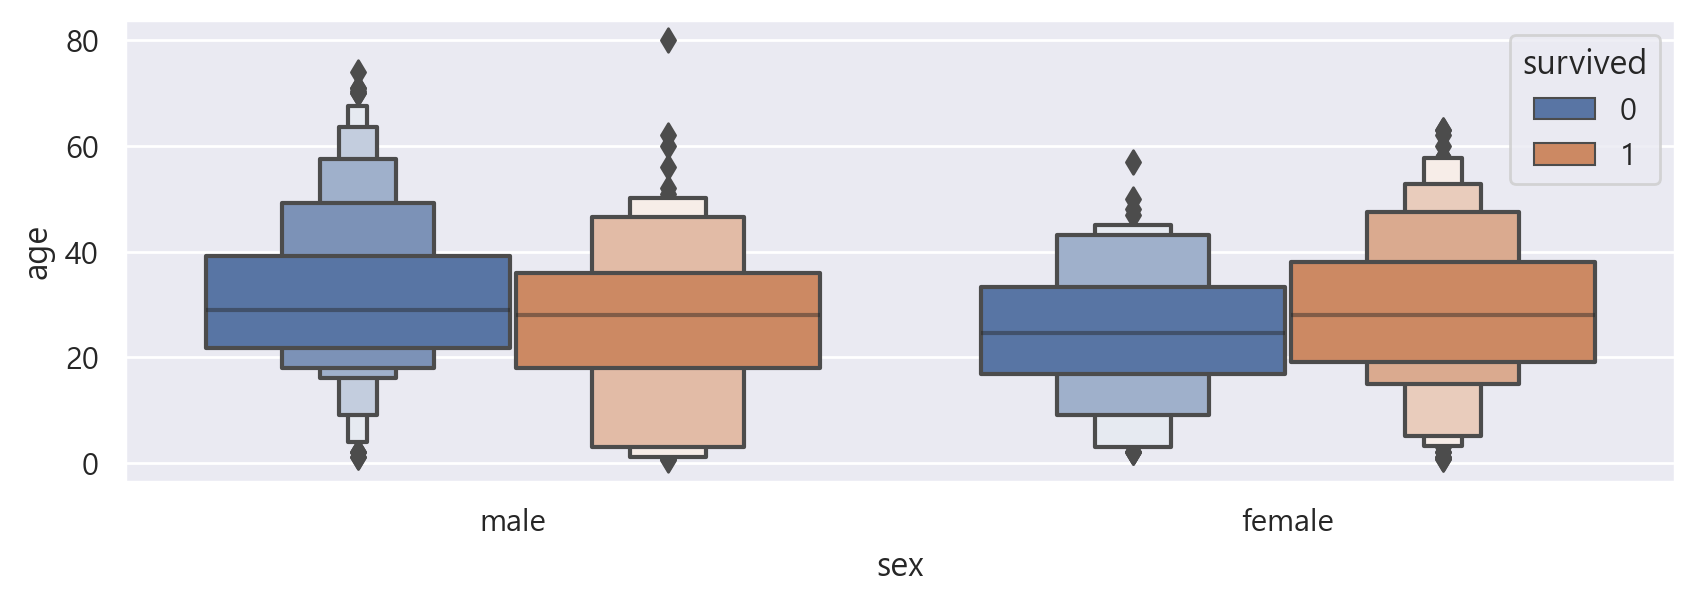

In [87]:
# boxenplot : box플롯 + 분포

sns.boxenplot(data = titanic, x = 'sex', y = 'age', hue = 'survived')
plt.show()

### 3) 쌍관계 그래프

- pairplot : 데이터프레임에 포함된 모든 수치형 변수 쌍에 대해 산점도(scatter)와 히스토그램

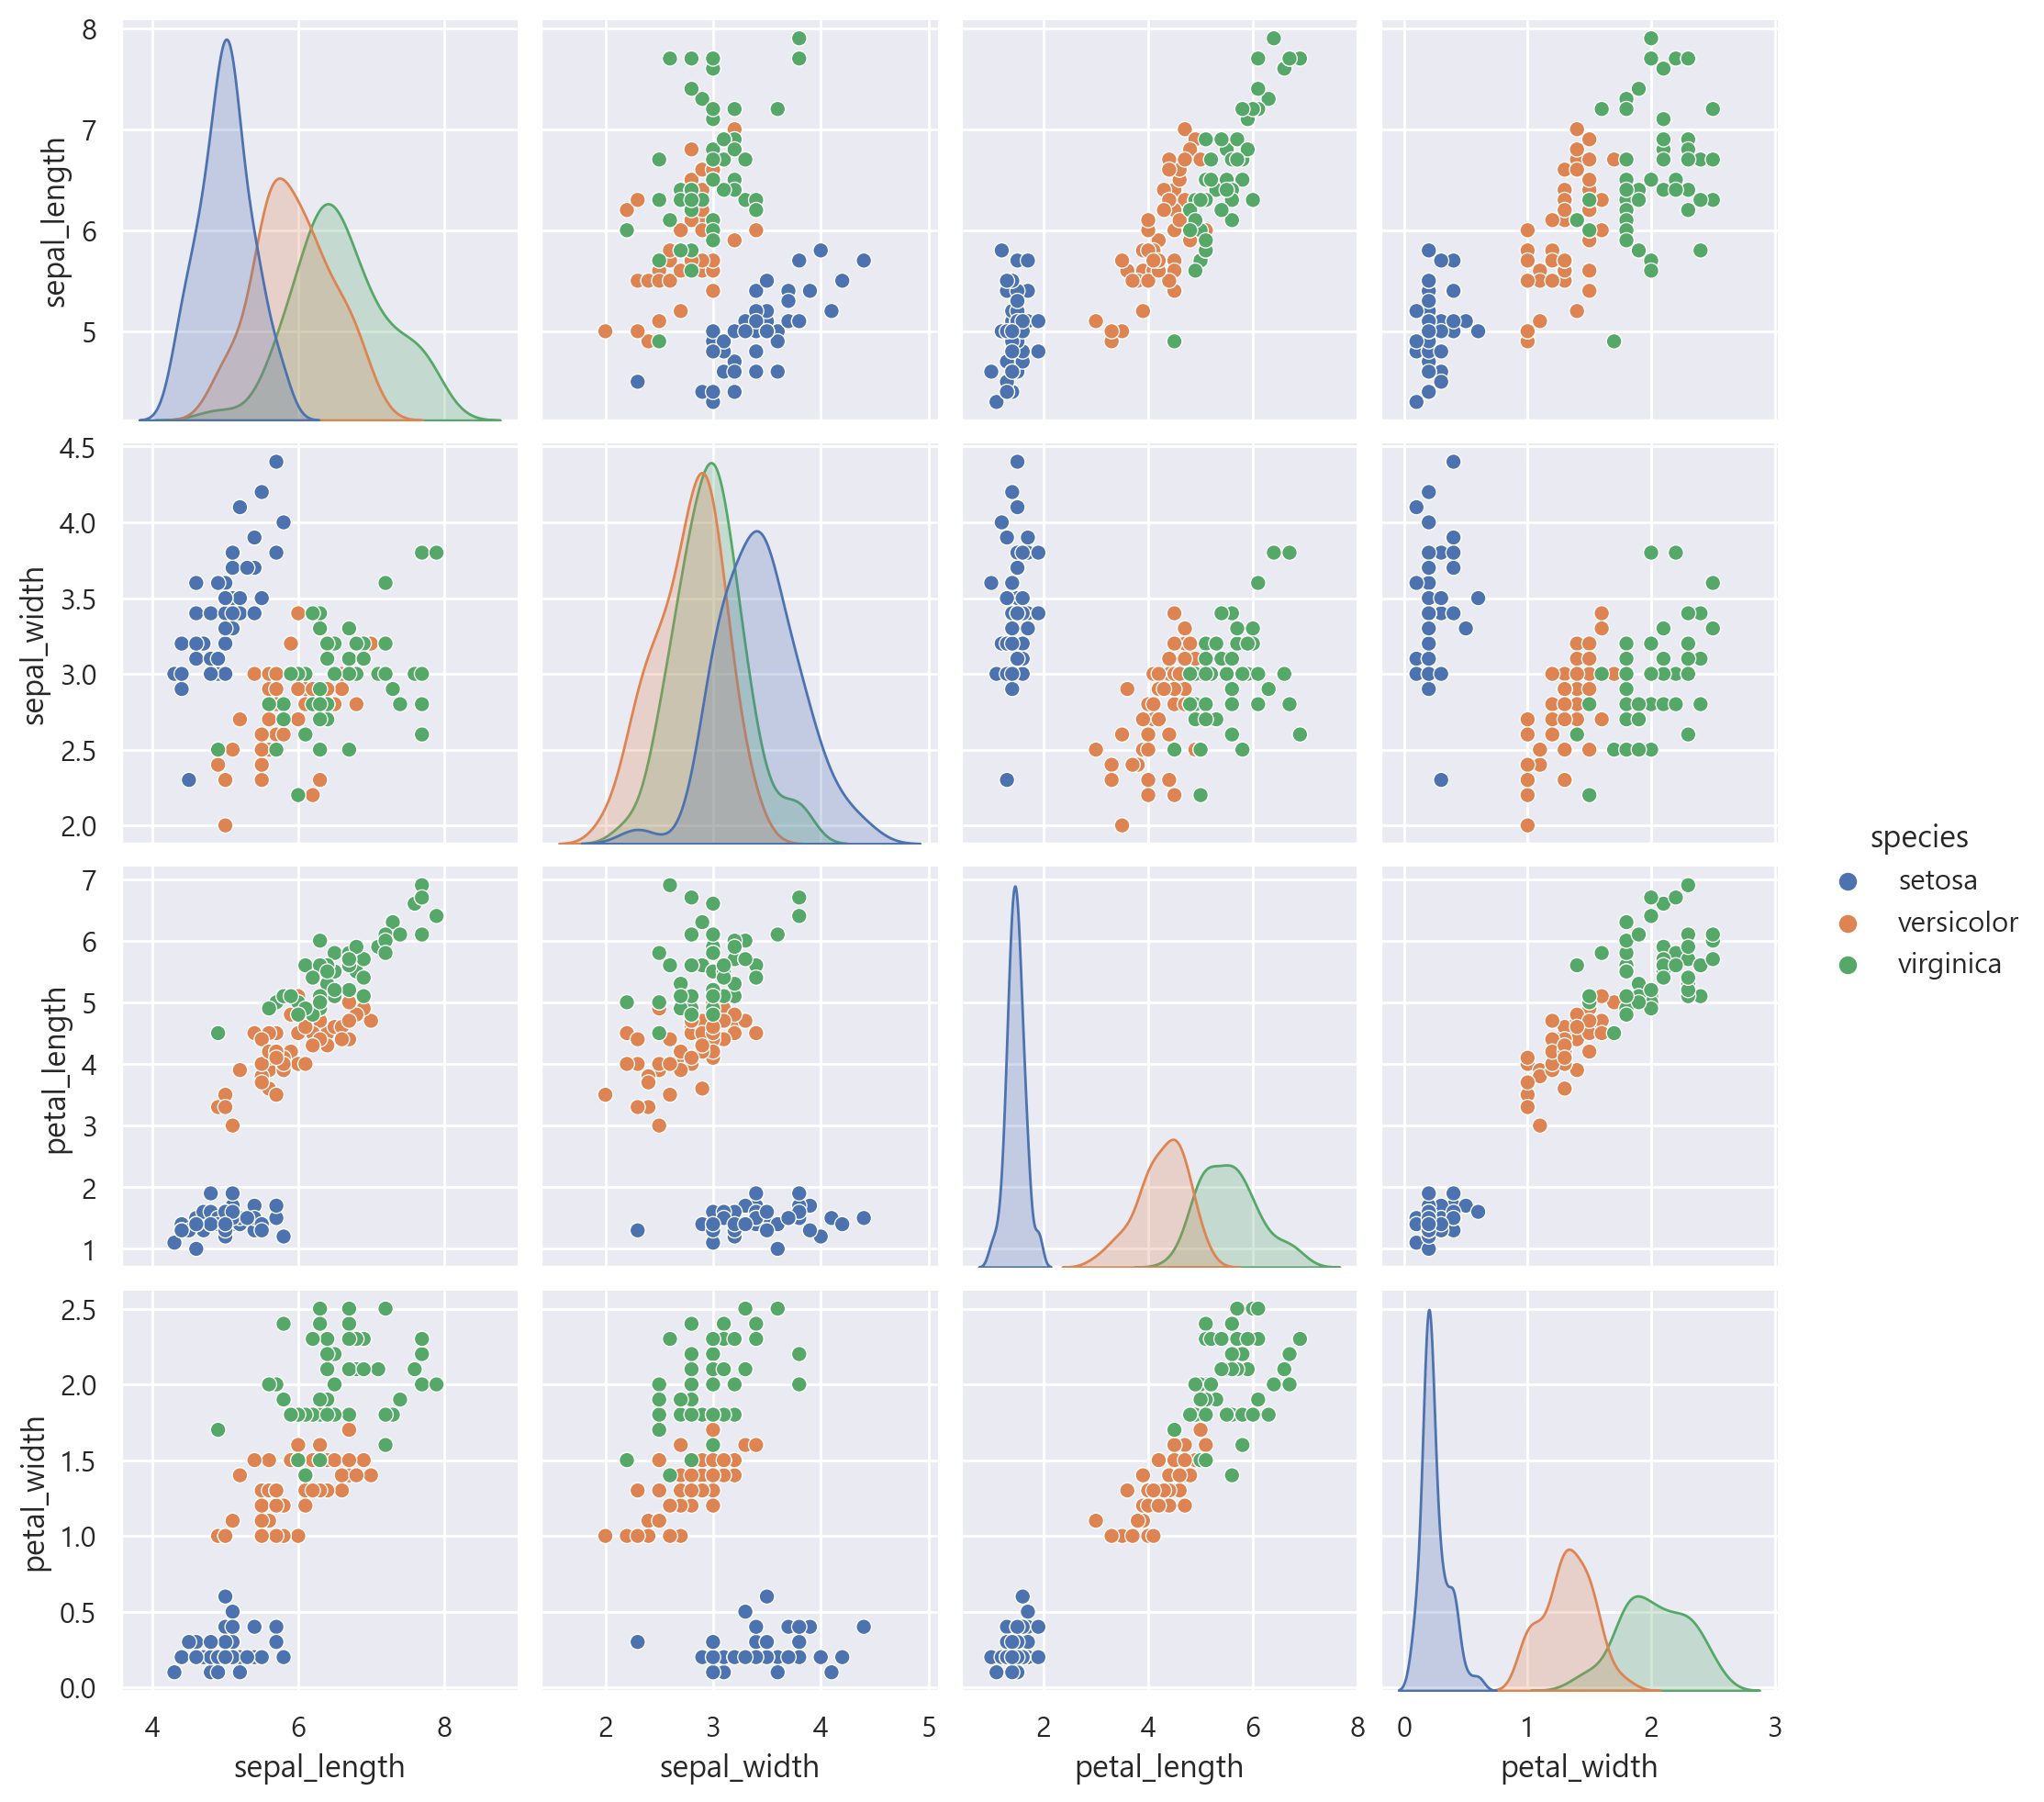

In [106]:
sns.pairplot(data = iris, hue = 'species')
plt.show()

### 4) 밀도 그래프

In [89]:
import numpy as np

x = np.random.randn(10000)  # 평균 0, 표준편차 1인 정규분포로 10000개 1차원 배열

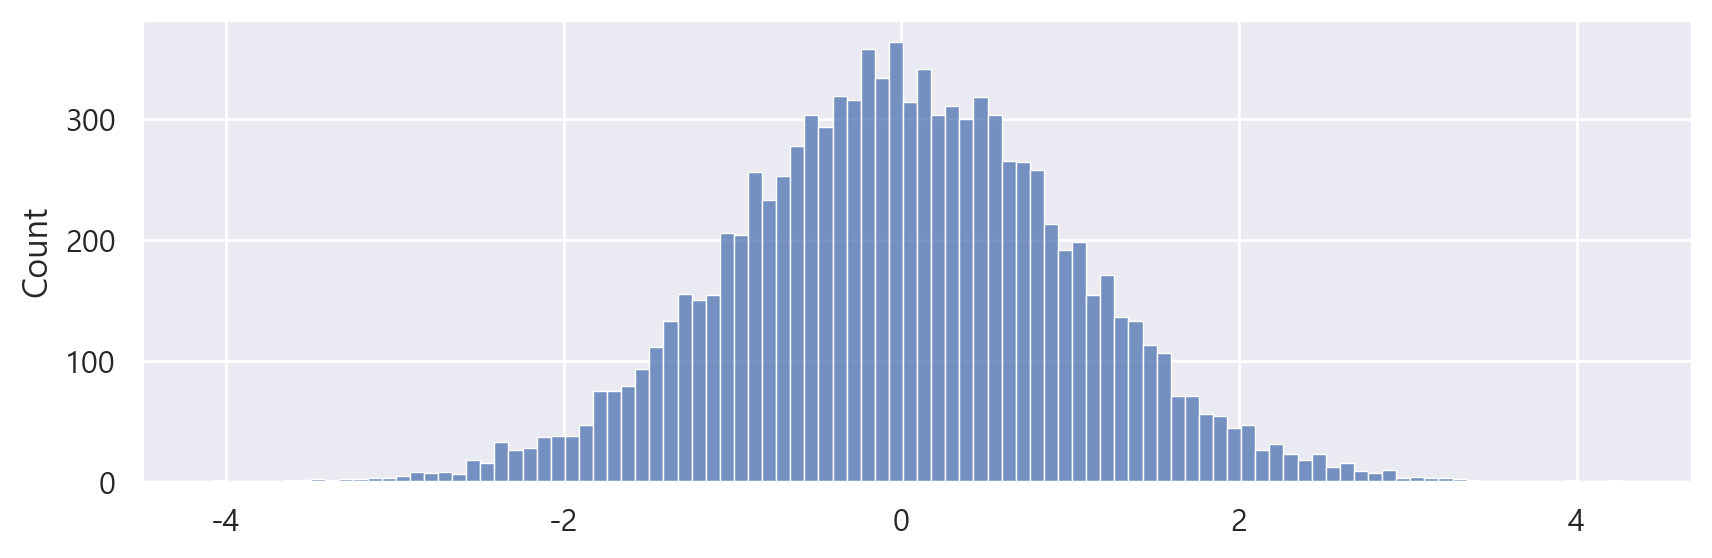

In [94]:
sns.histplot(x, bins = 100)
plt.show()

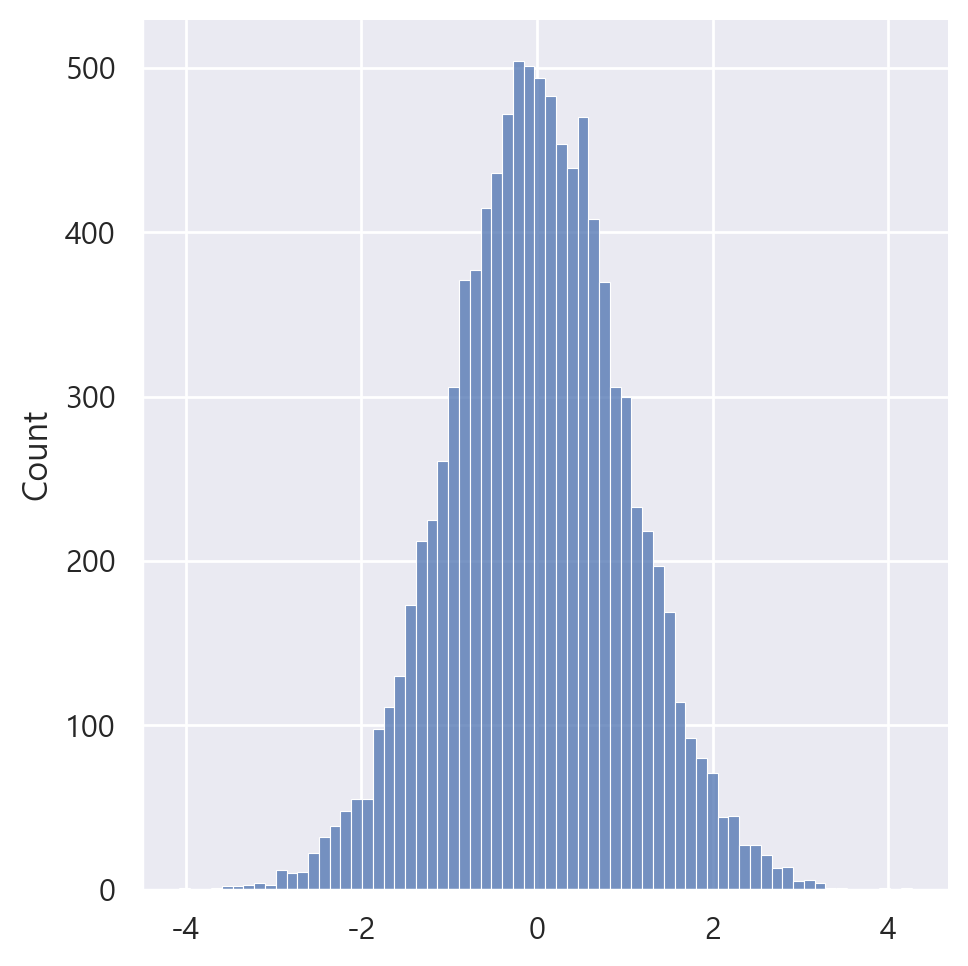

In [95]:
sns.displot(x)
plt.show()

### 5) 회귀 그래프

In [104]:
corr = iris.corr(numeric_only = True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


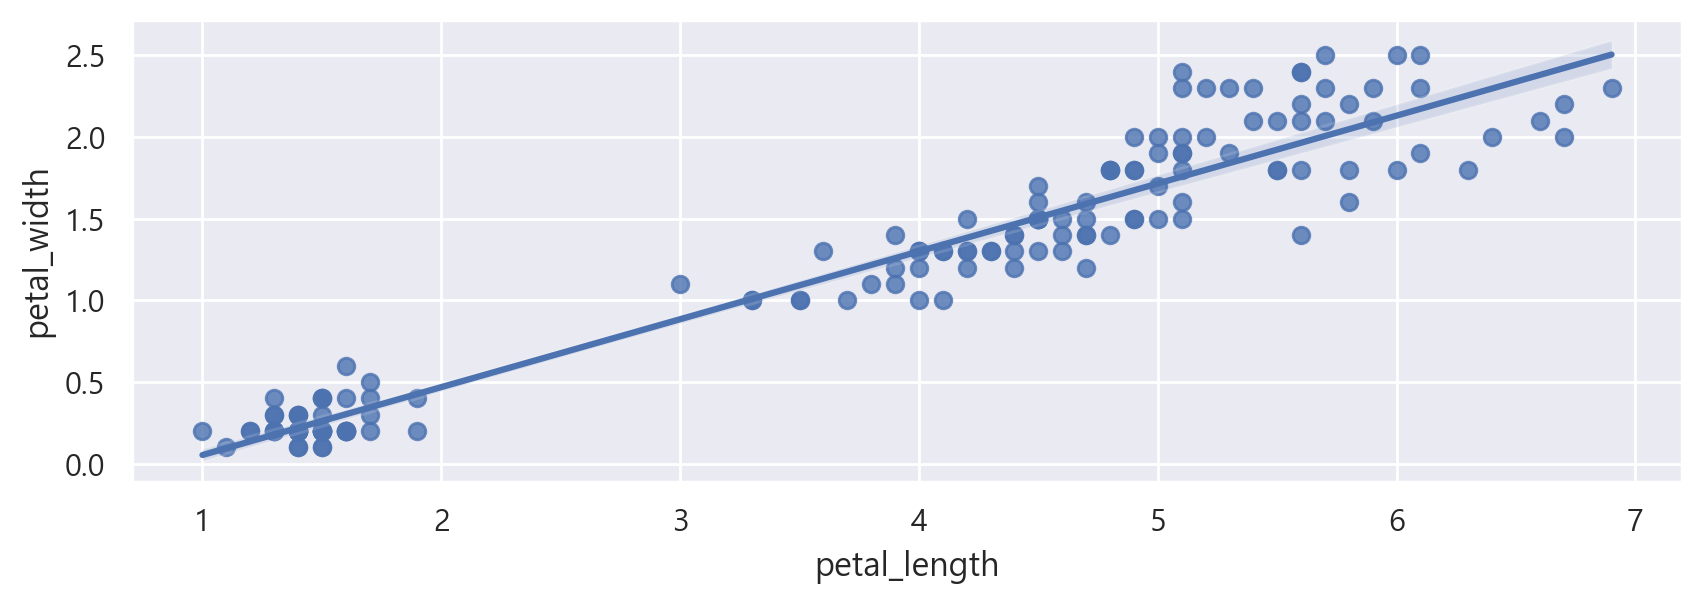

In [97]:
# 회귀 그래프 : regplot (hue 사용 불가), lmplot (hue 사용 가능)

sns.regplot(data = iris, x = 'petal_length', y ='petal_width')
plt.show()

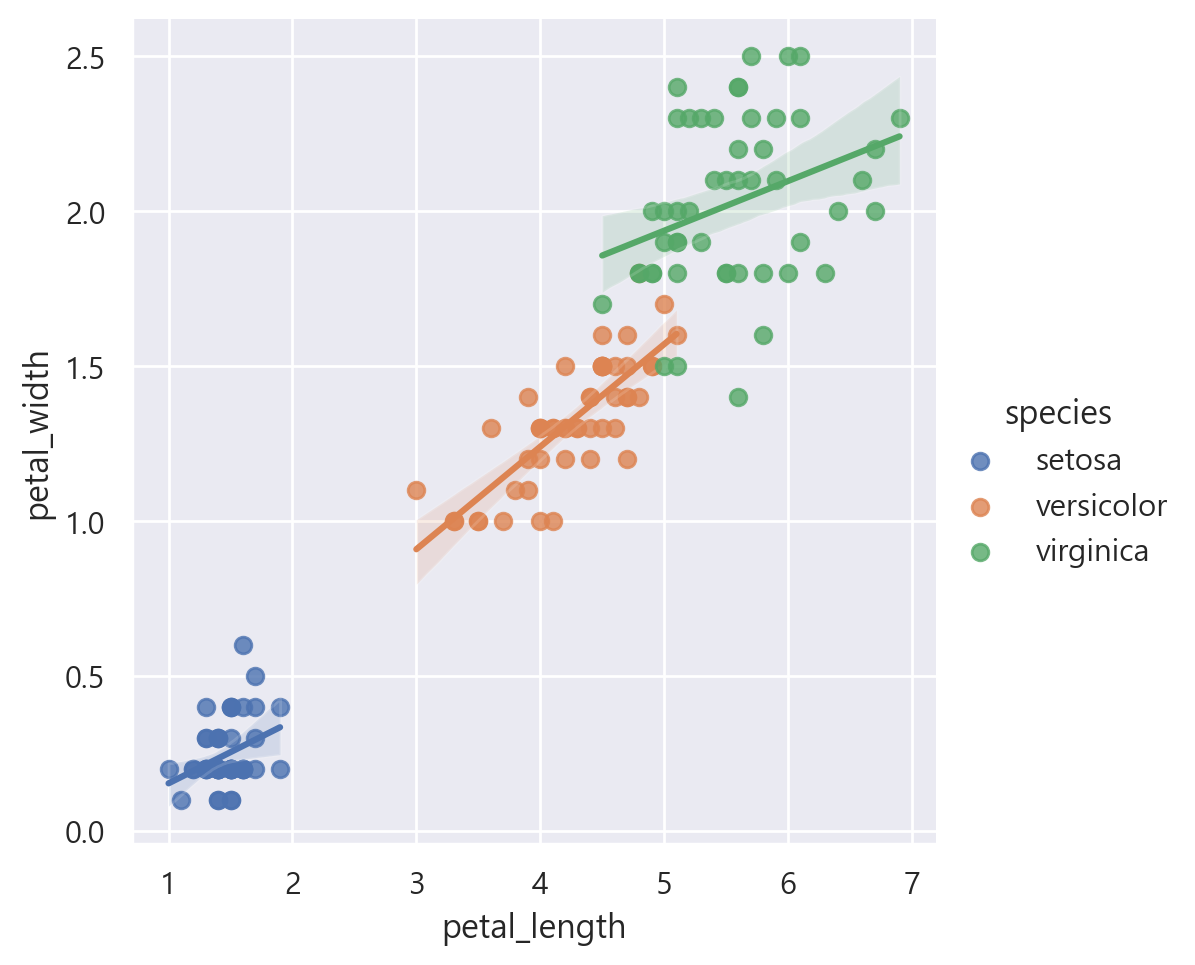

In [98]:
# 종별 회귀 그래프

sns.lmplot(data = iris, x = 'petal_length', y = 'petal_width',
           hue = 'species')
plt.show()

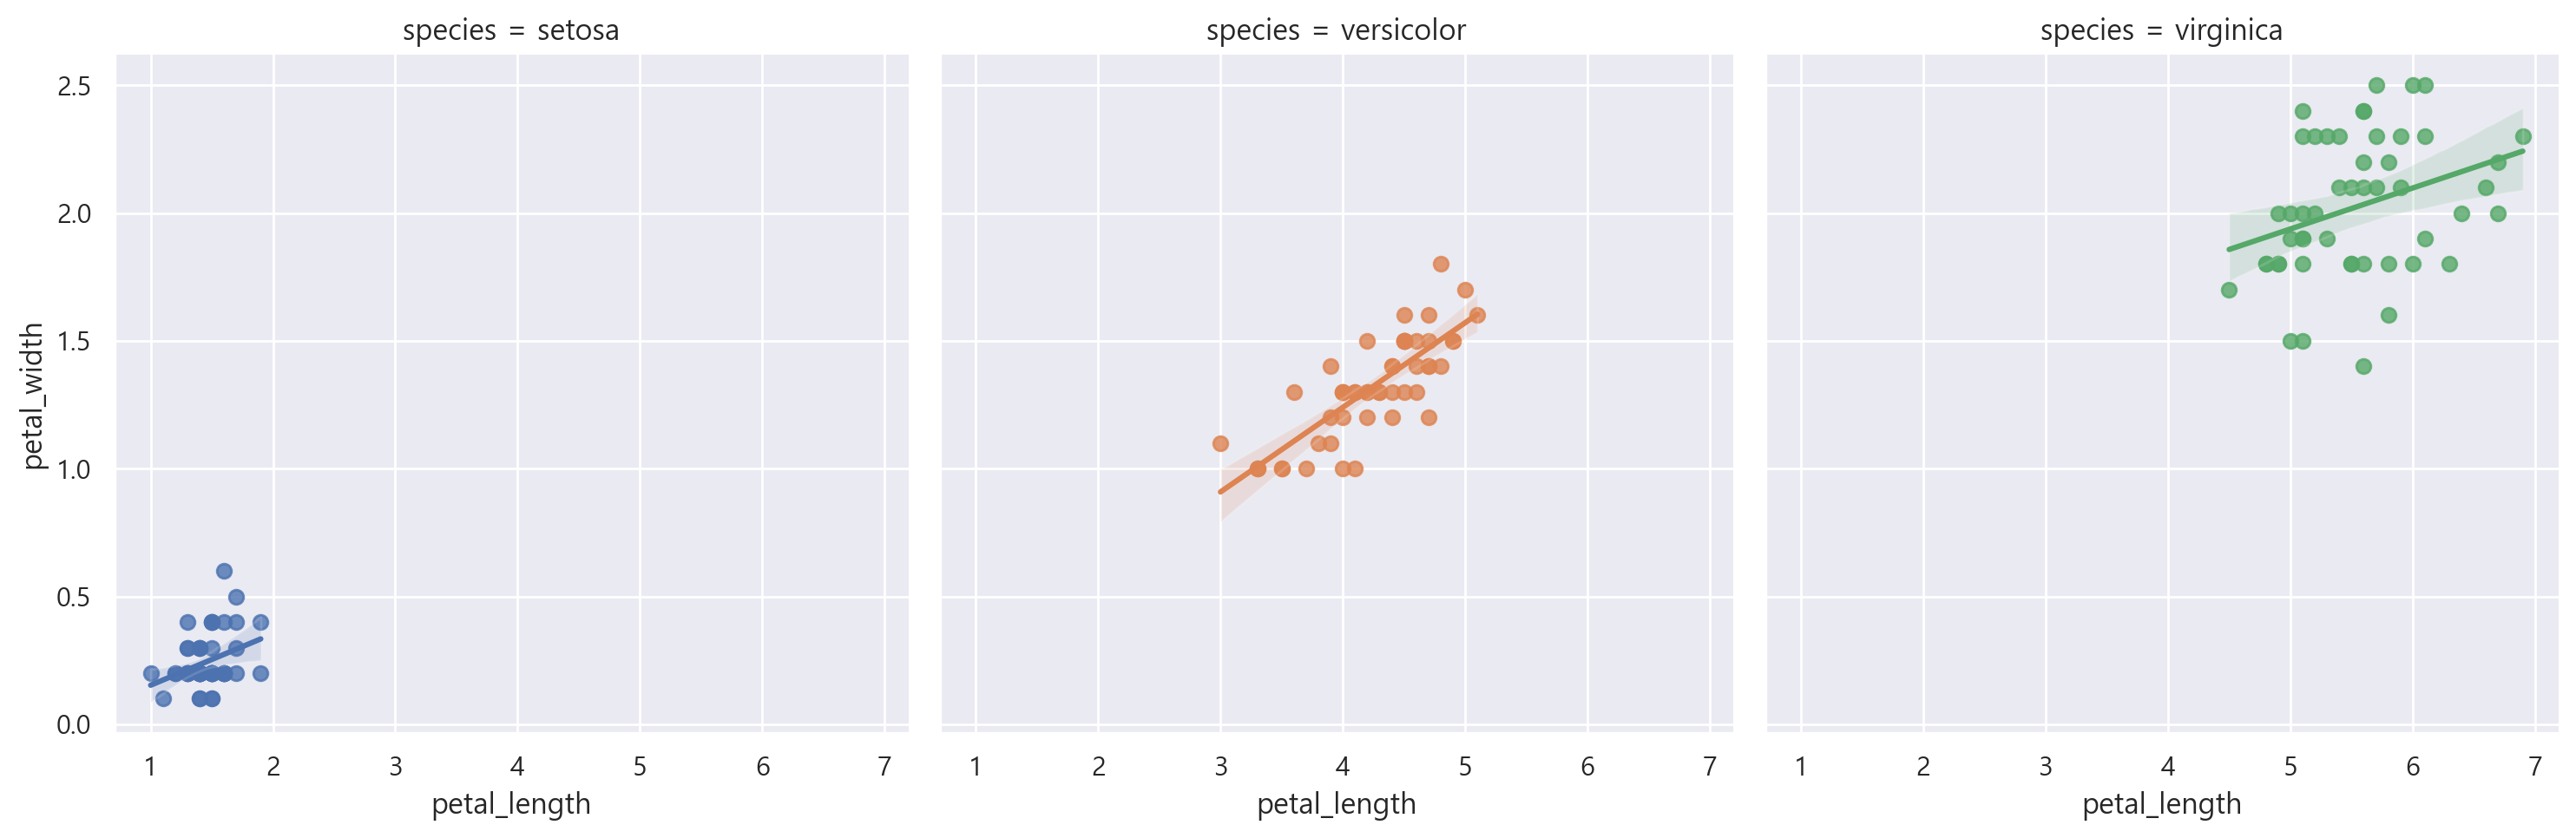

In [99]:
# 종별 회귀 그래프 (서브플롯)

sns.lmplot(data = iris, x = 'petal_length', y = 'petal_width',
           hue = 'species', 
           col = 'species')
plt.show()

## 2.4 다중 그래프를 위한 FacetGrid

- https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples (교안 73page)

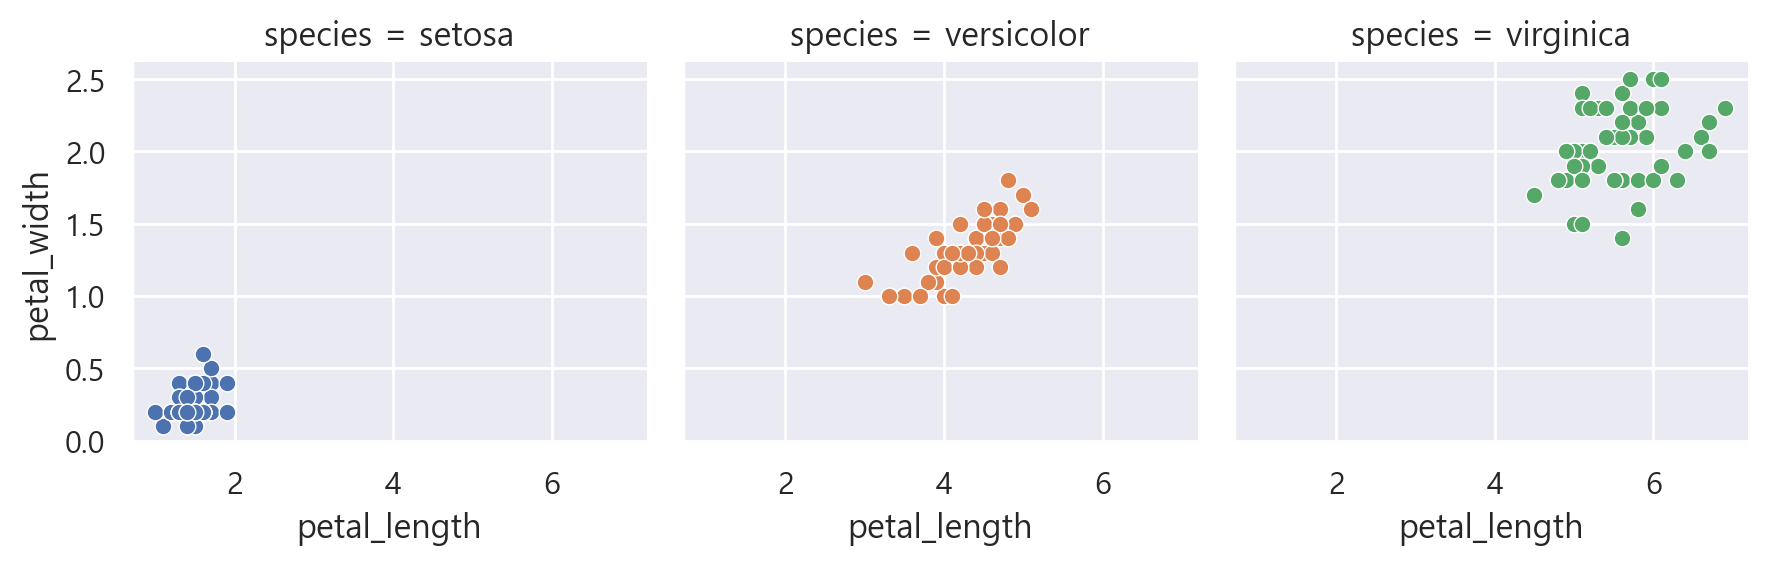

In [100]:
g = sns.FacetGrid(iris, col = 'species', hue = 'species')
g.map(sns.scatterplot, 'petal_length', 'petal_width')
plt.show()

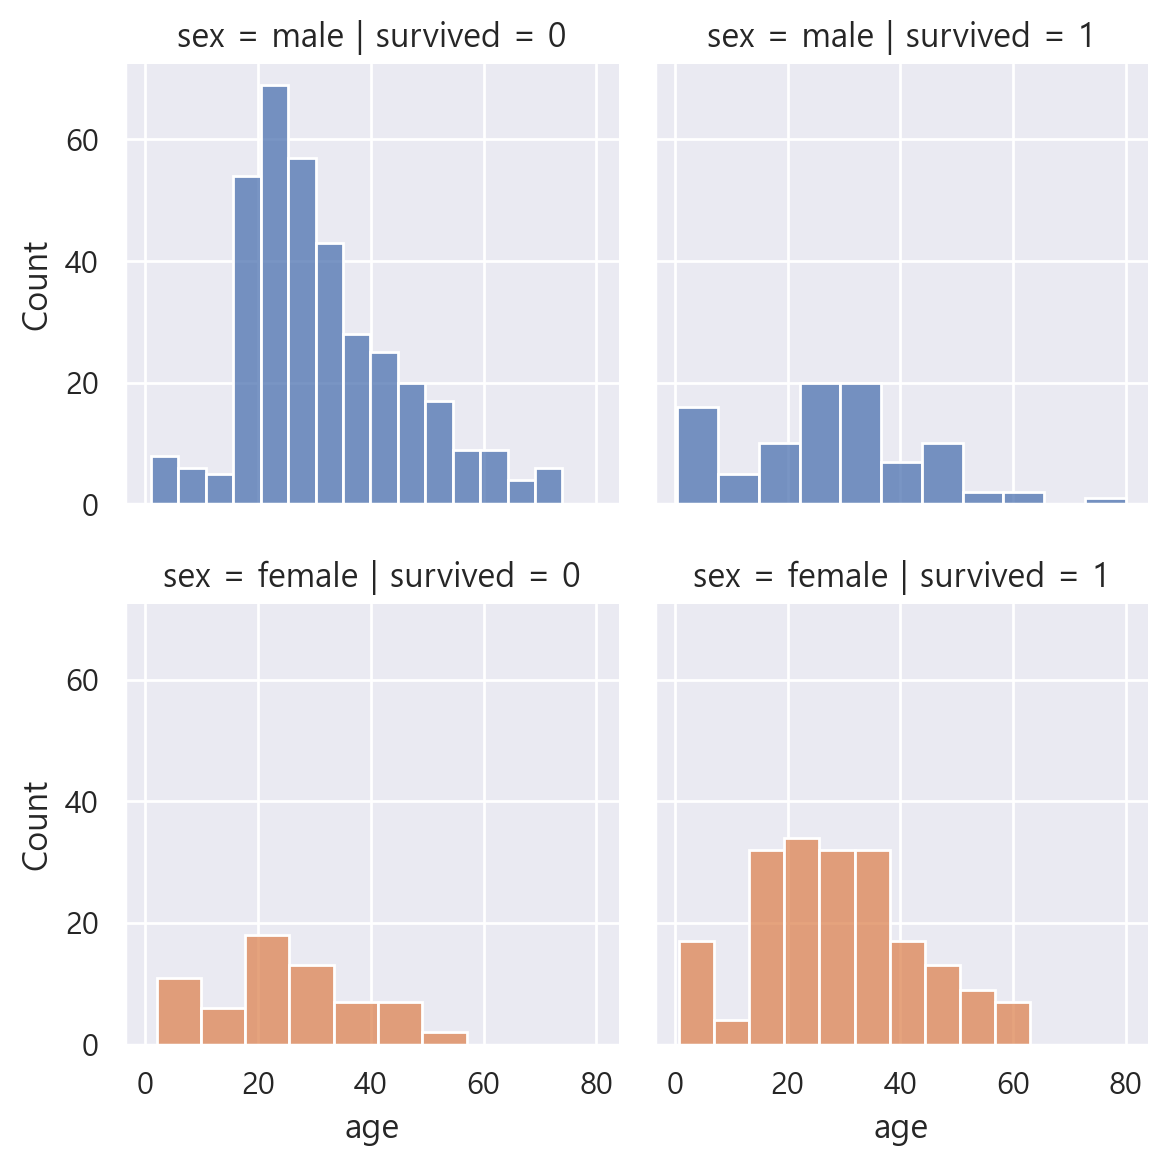

In [103]:
g = sns.FacetGrid(titanic, col = 'survived', hue = 'sex', row = 'sex')
g.map(sns.histplot, 'age')
plt.show()